Dokonczyc RNN
UNET testowac na innych zbiorach
Transformer
Podstawowe eksperymenty z RSA
Runtime - jak rozwiazac to zagadnienie???
Zestawienie porównania wyników modeli
Latex - zacząć pisać od końca
1. Przeglad aktualnych rozwiazan
2. Implementacja
3. Rezultaty

# RNN for R-peak detection using the pytorch library

In [1]:
import os
import pickle
import numpy as np
import neurokit2 as nk
import torch
import matplotlib.pyplot as plt
from customLib.vis import *
from customLib.preprocess import *
from customLib.peak_detection import *
from customLib.load_physionet_ecgs import load_physionet_ecgs
from customLib.dataset import read_dataset, split_dataset
from customLib.load_ptbxl import load_ptbxl
from customLib.config import apnea_ecg_path, mitbih_path
from models.models import LSTM
from customLib.print_model_parameters import print_model_parameters
# from torchsummary import summary

LSTM checkpoint - trained with # +40 with lr=1e-3, +4 with lr=1e-4 + 40 with lr = 1e-4 + 14 with lr= 1e-4 + 10 with lr = 1e-2 + 10 with lr = 1e-2 + 10 with lr = 1e-2

In [2]:
LSTM_HIDDEN_SIZE = 32
EPOCHS = 100
BATCH_SIZE = 100
LR = 1e-2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# laod and preprocess MITBIH or Apnea dataset
x, y = load_physionet_ecgs(path=mitbih_path, annotation_file_extension="atr" , force_new=True, window_in_seconds=10, expand=False, denoise=True)

In [19]:
path = mitbih_path + "\\dataset\\downsampled"
# x_train, y_train, x_test, y_test, x_val, y_val = split_dataset(path=mitbih_path, x=x, y=y, shuffle=False, split_ratio=0.8, is_validation_set=True)
x_train, y_train, x_test, y_test, x_val, y_val = read_dataset(path=path, is_validation_set=True)

x_train = np.expand_dims(x_train, 2)
y_train = np.expand_dims(y_train, 2)

x_test = np.expand_dims(x_test, 2)
y_test = np.expand_dims(y_test, 2)

x_val = np.expand_dims(x_val, 2)
y_val = np.expand_dims(y_val, 2)

In [5]:
num_pos = np.sum(y_train[0])
num_neg = len(y_train[0]) - num_pos
pos_weight = int(num_neg / num_pos / 5)
pos_weight = torch.tensor([pos_weight], dtype=torch.float32).to(device)
print(f"Positive label weight (R-peak): {(pos_weight.item()):.5f}")

Positive label weight (R-peak): 17.00000


In [7]:
model = LSTM(input_dim=1, hidden_size=LSTM_HIDDEN_SIZE, lr=LR, loss_pos_weight=pos_weight) #input_size == hidden features size (1-lead ECG)
model.load_state_dict(torch.load(".\\checkpoints\\lstm\\lstm_epoch_50_acc_99.80_f1_0.97.pt"))

Training will be performed with: cuda:0


e:\anaconda3\envs\torch\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


<All keys matched successfully>

In [ ]:
print_model_parameters(model)

In [ ]:
model.train_model(x_train=x_train, y_train=y_train, epochs=EPOCHS, x_val=x_val, y_val=y_val, batch_size=BATCH_SIZE)

In [ ]:
with open("./metrics/lstm.pkl", "wb") as f:
  pickle.dump(model.get_metrics(), f)

In [6]:
with open("./metrics/lstm.pkl", "rb") as f:
  metrics = pickle.load(f)

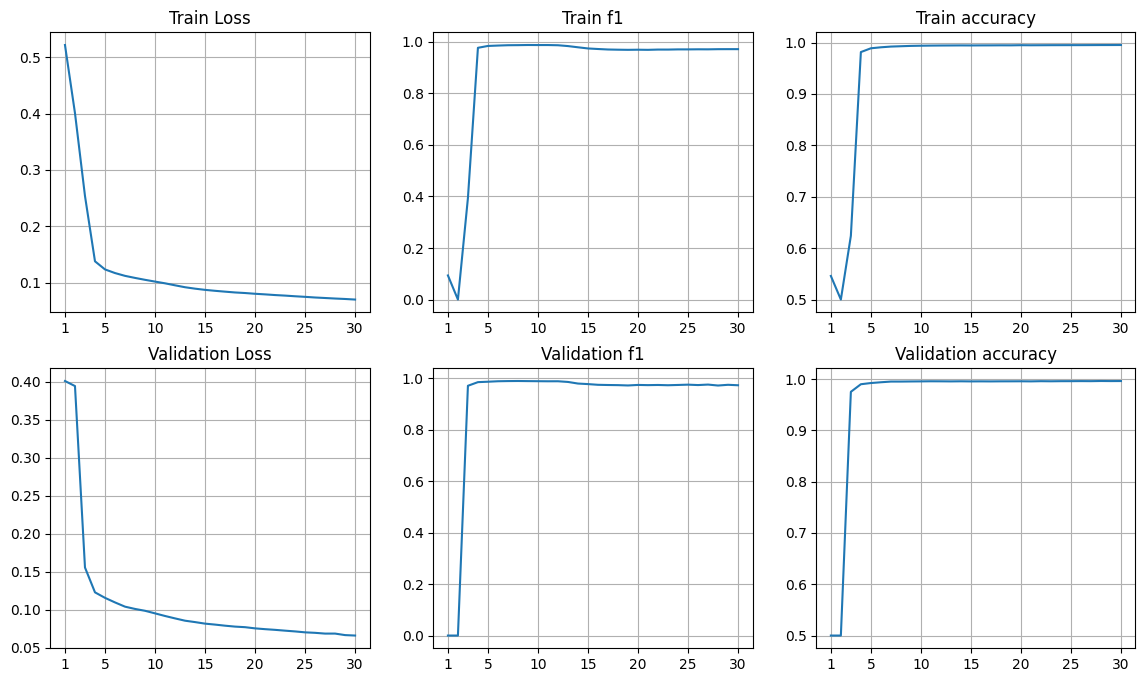

In [7]:
plot_metrics(metrics)

====Epoch [1/100]====


 97%|█████████▋| 116/119 [00:06<00:00, 19.14it/s]

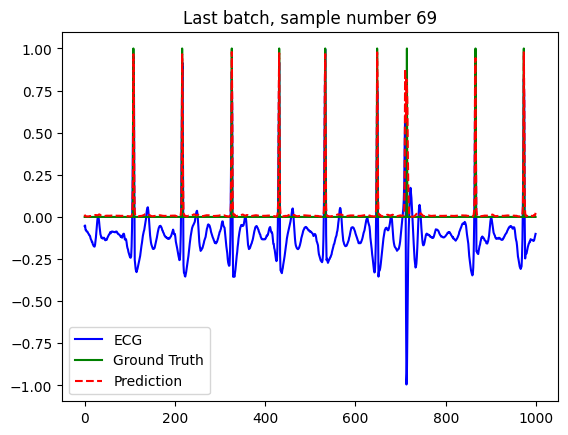

100%|██████████| 119/119 [00:06<00:00, 17.79it/s]


Learning rate:  [0.01]

Train Loss: 0.3400
Train Weighted Accuracy: 0.79695
Train F1 Score: 0.71150
Train TPR: 0.59490
Train FPR: 0.00099
Train TNR: 0.99901
Train FNR: 0.40510



100%|██████████| 20/20 [00:00<00:00, 30.31it/s]



Validation Loss: 0.1365
Validation Weighted Accuracy: 0.98932
Validation F1 Score: 0.93198
Validation TPR: 0.98023
Validation FPR: 0.00159
Validation TNR: 0.99841
Validation FNR: 0.01977

====Epoch [2/100]====


 97%|█████████▋| 116/119 [00:06<00:00, 19.63it/s]

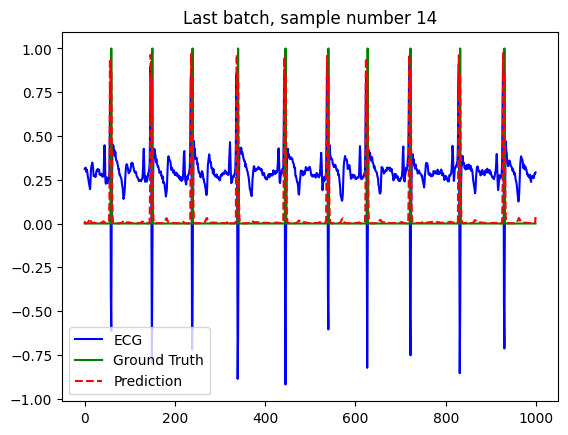

100%|██████████| 119/119 [00:06<00:00, 17.89it/s]


Learning rate:  [0.01]

Train Loss: 0.1181
Train Weighted Accuracy: 0.99100
Train F1 Score: 0.95321
Train TPR: 0.98302
Train FPR: 0.00102
Train TNR: 0.99898
Train FNR: 0.01698



100%|██████████| 20/20 [00:00<00:00, 23.66it/s]



Validation Loss: 0.1042
Validation Weighted Accuracy: 0.99494
Validation F1 Score: 0.96059
Validation TPR: 0.99081
Validation FPR: 0.00093
Validation TNR: 0.99907
Validation FNR: 0.00919

====Epoch [3/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.70it/s]

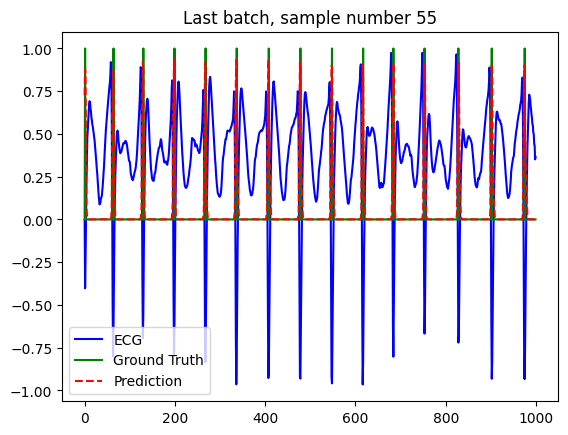

100%|██████████| 119/119 [00:06<00:00, 17.08it/s]


Learning rate:  [0.01]

Train Loss: 0.0967
Train Weighted Accuracy: 0.99431
Train F1 Score: 0.95782
Train TPR: 0.98962
Train FPR: 0.00099
Train TNR: 0.99901
Train FNR: 0.01038



100%|██████████| 20/20 [00:00<00:00, 30.08it/s]



Validation Loss: 0.0902
Validation Weighted Accuracy: 0.99662
Validation F1 Score: 0.94906
Validation TPR: 0.99455
Validation FPR: 0.00130
Validation TNR: 0.99870
Validation FNR: 0.00545

====Epoch [4/100]====


 98%|█████████▊| 117/119 [00:06<00:00, 19.16it/s]

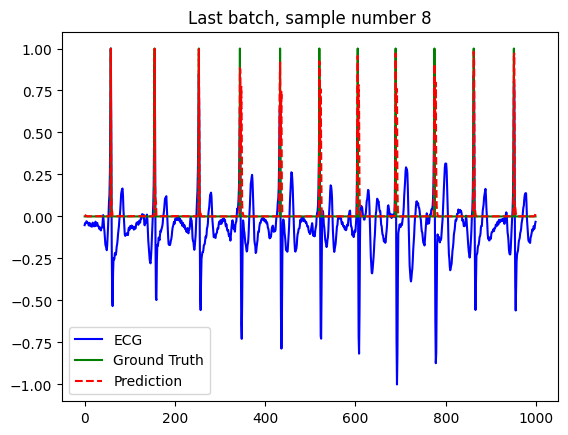

100%|██████████| 119/119 [00:07<00:00, 16.96it/s]


Learning rate:  [0.01]

Train Loss: 0.0870
Train Weighted Accuracy: 0.99496
Train F1 Score: 0.94889
Train TPR: 0.99117
Train FPR: 0.00126
Train TNR: 0.99874
Train FNR: 0.00883



100%|██████████| 20/20 [00:00<00:00, 27.86it/s]



Validation Loss: 0.0815
Validation Weighted Accuracy: 0.99676
Validation F1 Score: 0.94746
Validation TPR: 0.99487
Validation FPR: 0.00135
Validation TNR: 0.99865
Validation FNR: 0.00513

====Epoch [5/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.92it/s]

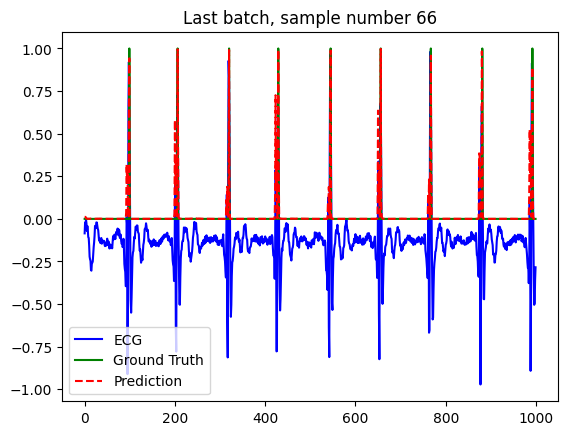

100%|██████████| 119/119 [00:07<00:00, 16.73it/s]


Learning rate:  [0.01]

Train Loss: 0.0782
Train Weighted Accuracy: 0.99552
Train F1 Score: 0.95043
Train TPR: 0.99227
Train FPR: 0.00123
Train TNR: 0.99877
Train FNR: 0.00773



100%|██████████| 20/20 [00:00<00:00, 27.28it/s]



Validation Loss: 0.0747
Validation Weighted Accuracy: 0.99663
Validation F1 Score: 0.94641
Validation TPR: 0.99463
Validation FPR: 0.00138
Validation TNR: 0.99862
Validation FNR: 0.00537

====Epoch [6/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.99it/s]

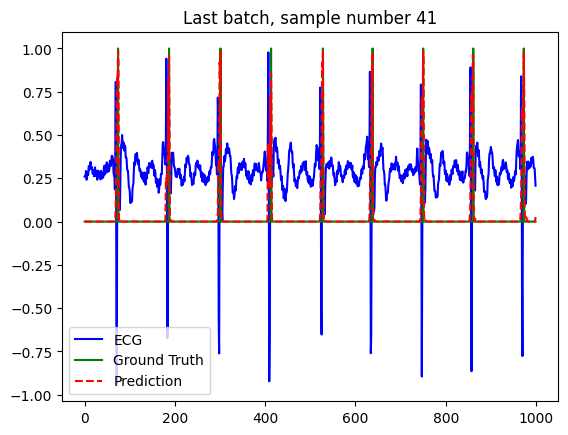

100%|██████████| 119/119 [00:06<00:00, 18.04it/s]


Learning rate:  [0.01]

Train Loss: 0.0719
Train Weighted Accuracy: 0.99577
Train F1 Score: 0.95374
Train TPR: 0.99269
Train FPR: 0.00114
Train TNR: 0.99886
Train FNR: 0.00731



100%|██████████| 20/20 [00:00<00:00, 28.21it/s]



Validation Loss: 0.0698
Validation Weighted Accuracy: 0.99695
Validation F1 Score: 0.95118
Validation TPR: 0.99515
Validation FPR: 0.00125
Validation TNR: 0.99875
Validation FNR: 0.00485

====Epoch [7/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.85it/s]

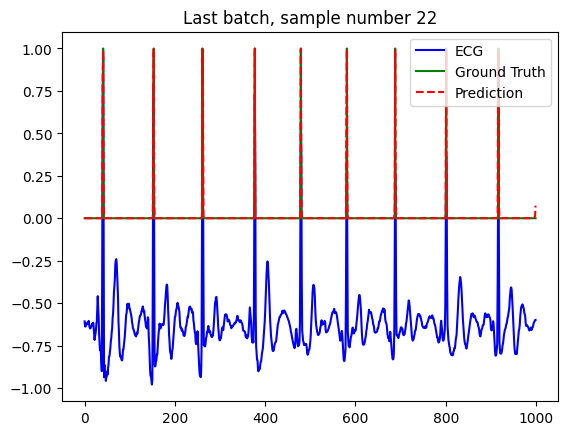

100%|██████████| 119/119 [00:06<00:00, 17.55it/s]


Learning rate:  [0.01]

Train Loss: 0.0690
Train Weighted Accuracy: 0.99579
Train F1 Score: 0.95531
Train TPR: 0.99268
Train FPR: 0.00110
Train TNR: 0.99890
Train FNR: 0.00732



100%|██████████| 20/20 [00:00<00:00, 26.01it/s]



Validation Loss: 0.0655
Validation Weighted Accuracy: 0.99654
Validation F1 Score: 0.95726
Validation TPR: 0.99415
Validation FPR: 0.00107
Validation TNR: 0.99893
Validation FNR: 0.00585

====Epoch [8/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.95it/s]

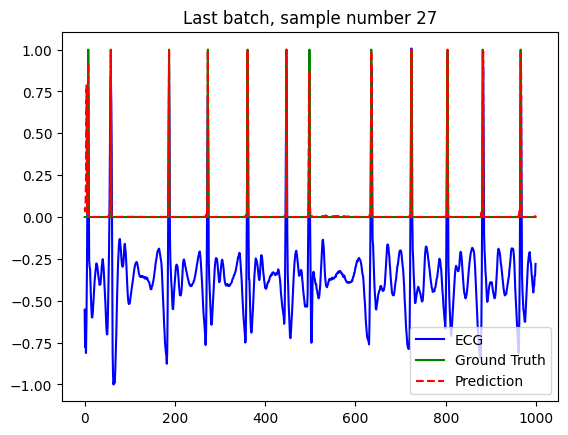

100%|██████████| 119/119 [00:06<00:00, 17.40it/s]


Learning rate:  [0.01]

Train Loss: 0.0643
Train Weighted Accuracy: 0.99611
Train F1 Score: 0.95825
Train TPR: 0.99325
Train FPR: 0.00102
Train TNR: 0.99898
Train FNR: 0.00675



100%|██████████| 20/20 [00:00<00:00, 30.96it/s]



Validation Loss: 0.0610
Validation Weighted Accuracy: 0.99660
Validation F1 Score: 0.96541
Validation TPR: 0.99403
Validation FPR: 0.00084
Validation TNR: 0.99916
Validation FNR: 0.00597

====Epoch [9/100]====


 98%|█████████▊| 117/119 [00:06<00:00, 19.49it/s]

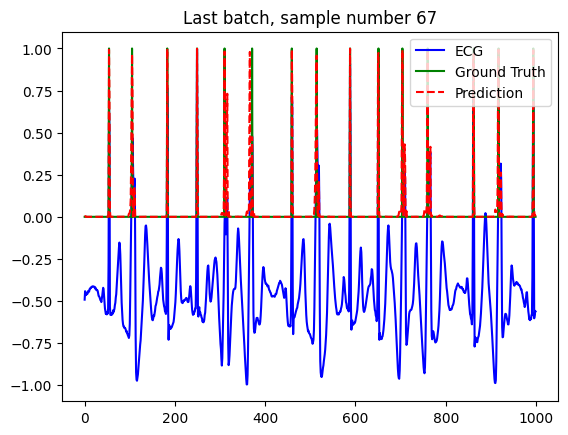

100%|██████████| 119/119 [00:06<00:00, 17.77it/s]


Learning rate:  [0.01]

Train Loss: 0.0626
Train Weighted Accuracy: 0.99617
Train F1 Score: 0.95761
Train TPR: 0.99338
Train FPR: 0.00104
Train TNR: 0.99896
Train FNR: 0.00662



100%|██████████| 20/20 [00:00<00:00, 30.30it/s]



Validation Loss: 0.0602
Validation Weighted Accuracy: 0.99684
Validation F1 Score: 0.96340
Validation TPR: 0.99459
Validation FPR: 0.00090
Validation TNR: 0.99910
Validation FNR: 0.00541

====Epoch [10/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.96it/s]

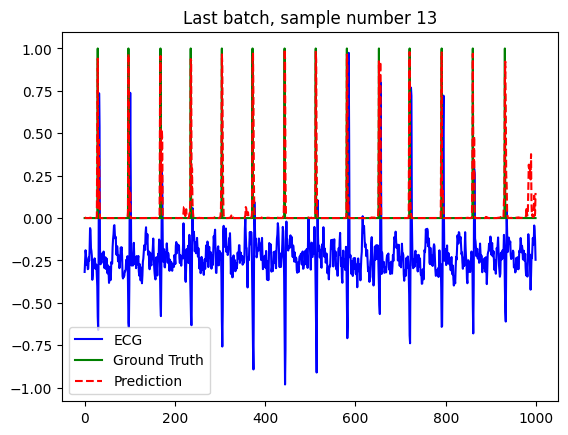

100%|██████████| 119/119 [00:06<00:00, 17.45it/s]


Learning rate:  [0.01]

Train Loss: 0.0584
Train Weighted Accuracy: 0.99649
Train F1 Score: 0.96118
Train TPR: 0.99392
Train FPR: 0.00095
Train TNR: 0.99905
Train FNR: 0.00608



100%|██████████| 20/20 [00:00<00:00, 30.79it/s]



Validation Loss: 0.0571
Validation Weighted Accuracy: 0.99703
Validation F1 Score: 0.96410
Validation TPR: 0.99495
Validation FPR: 0.00089
Validation TNR: 0.99911
Validation FNR: 0.00505

====Epoch [11/100]====


 98%|█████████▊| 117/119 [00:06<00:00, 19.74it/s]

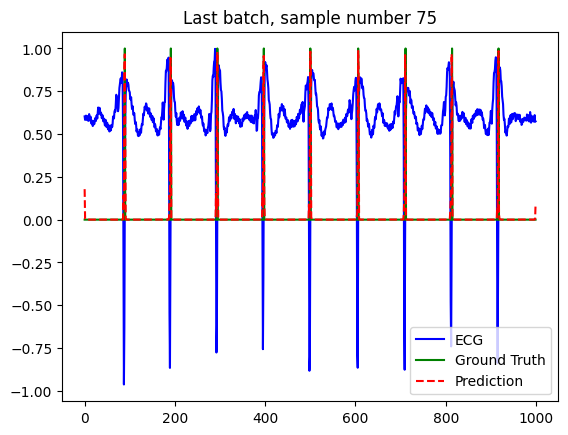

100%|██████████| 119/119 [00:06<00:00, 17.79it/s]


Learning rate:  [0.01]

Train Loss: 0.0552
Train Weighted Accuracy: 0.99660
Train F1 Score: 0.96288
Train TPR: 0.99410
Train FPR: 0.00091
Train TNR: 0.99909
Train FNR: 0.00590



100%|██████████| 20/20 [00:00<00:00, 26.66it/s]



Validation Loss: 0.0553
Validation Weighted Accuracy: 0.99711
Validation F1 Score: 0.96815
Validation TPR: 0.99499
Validation FPR: 0.00078
Validation TNR: 0.99922
Validation FNR: 0.00501

====Epoch [12/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.87it/s]

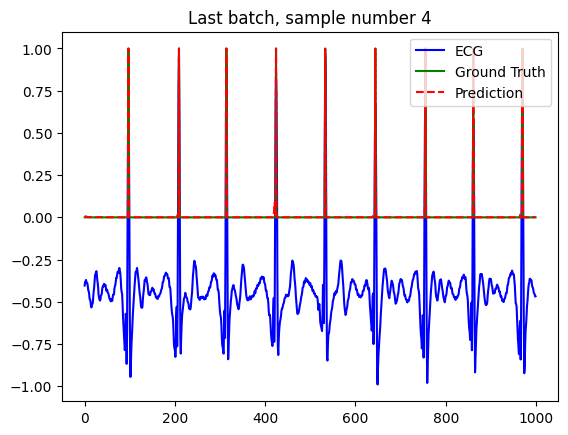

100%|██████████| 119/119 [00:06<00:00, 17.81it/s]


Learning rate:  [0.01]

Train Loss: 0.0530
Train Weighted Accuracy: 0.99677
Train F1 Score: 0.96430
Train TPR: 0.99442
Train FPR: 0.00087
Train TNR: 0.99913
Train FNR: 0.00558



100%|██████████| 20/20 [00:00<00:00, 30.52it/s]



Validation Loss: 0.0534
Validation Weighted Accuracy: 0.99707
Validation F1 Score: 0.97138
Validation TPR: 0.99483
Validation FPR: 0.00069
Validation TNR: 0.99931
Validation FNR: 0.00517

====Epoch [13/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.79it/s]

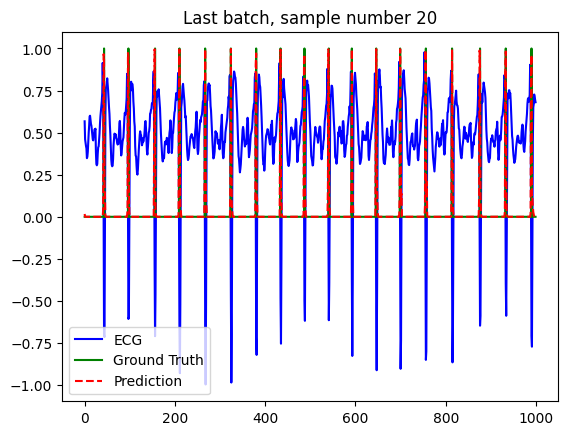

100%|██████████| 119/119 [00:06<00:00, 17.61it/s]


Learning rate:  [0.01]

Train Loss: 0.0514
Train Weighted Accuracy: 0.99681
Train F1 Score: 0.96468
Train TPR: 0.99449
Train FPR: 0.00086
Train TNR: 0.99914
Train FNR: 0.00551



100%|██████████| 20/20 [00:00<00:00, 30.24it/s]



Validation Loss: 0.0517
Validation Weighted Accuracy: 0.99731
Validation F1 Score: 0.96912
Validation TPR: 0.99539
Validation FPR: 0.00076
Validation TNR: 0.99924
Validation FNR: 0.00461

====Epoch [14/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.97it/s]

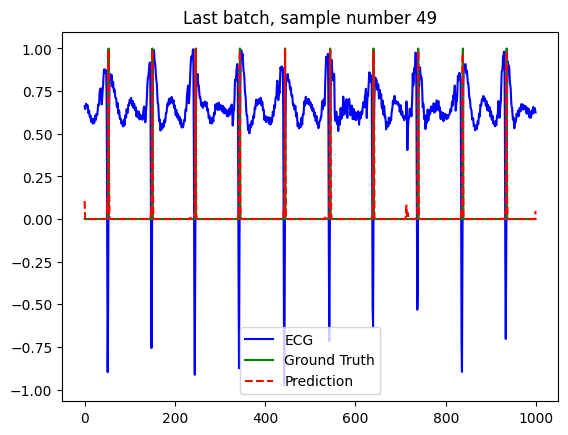

100%|██████████| 119/119 [00:06<00:00, 17.95it/s]


Learning rate:  [0.01]

Train Loss: 0.0494
Train Weighted Accuracy: 0.99697
Train F1 Score: 0.96665
Train TPR: 0.99476
Train FPR: 0.00081
Train TNR: 0.99919
Train FNR: 0.00524



100%|██████████| 20/20 [00:00<00:00, 30.40it/s]



Validation Loss: 0.0518
Validation Weighted Accuracy: 0.99729
Validation F1 Score: 0.97171
Validation TPR: 0.99527
Validation FPR: 0.00068
Validation TNR: 0.99932
Validation FNR: 0.00473

====Epoch [15/100]====


 98%|█████████▊| 117/119 [00:06<00:00, 19.82it/s]

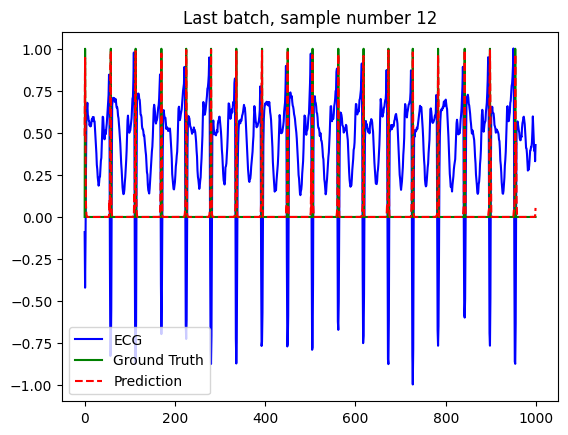

100%|██████████| 119/119 [00:06<00:00, 17.62it/s]


Learning rate:  [0.001]

Train Loss: 0.0474
Train Weighted Accuracy: 0.99704
Train F1 Score: 0.96781
Train TPR: 0.99486
Train FPR: 0.00078
Train TNR: 0.99922
Train FNR: 0.00514



100%|██████████| 20/20 [00:00<00:00, 29.84it/s]



Validation Loss: 0.0501
Validation Weighted Accuracy: 0.99733
Validation F1 Score: 0.97015
Validation TPR: 0.99539
Validation FPR: 0.00073
Validation TNR: 0.99927
Validation FNR: 0.00461

====Epoch [16/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.92it/s]

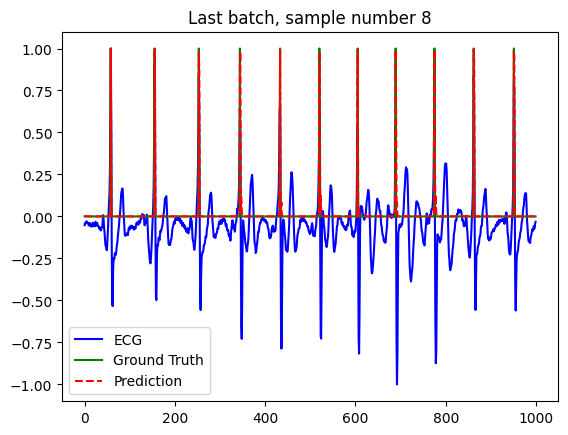

100%|██████████| 119/119 [00:06<00:00, 17.91it/s]


Learning rate:  [0.001]

Train Loss: 0.0436
Train Weighted Accuracy: 0.99727
Train F1 Score: 0.97045
Train TPR: 0.99527
Train FPR: 0.00072
Train TNR: 0.99928
Train FNR: 0.00473



100%|██████████| 20/20 [00:00<00:00, 25.97it/s]



Validation Loss: 0.0459
Validation Weighted Accuracy: 0.99721
Validation F1 Score: 0.97120
Validation TPR: 0.99511
Validation FPR: 0.00070
Validation TNR: 0.99930
Validation FNR: 0.00489

====Epoch [17/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.96it/s]

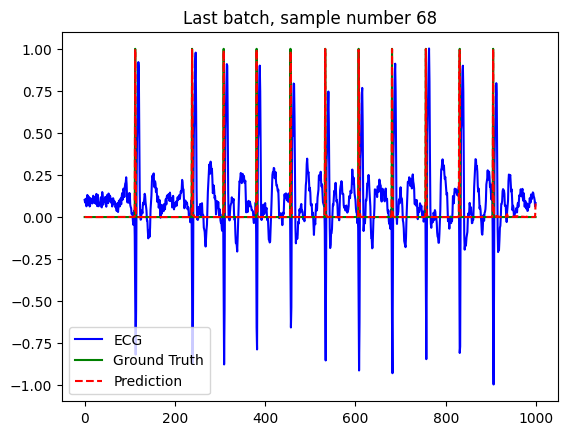

100%|██████████| 119/119 [00:06<00:00, 17.62it/s]


Learning rate:  [0.001]

Train Loss: 0.0427
Train Weighted Accuracy: 0.99727
Train F1 Score: 0.97125
Train TPR: 0.99524
Train FPR: 0.00070
Train TNR: 0.99930
Train FNR: 0.00476



100%|██████████| 20/20 [00:00<00:00, 27.39it/s]



Validation Loss: 0.0457
Validation Weighted Accuracy: 0.99729
Validation F1 Score: 0.97145
Validation TPR: 0.99527
Validation FPR: 0.00069
Validation TNR: 0.99931
Validation FNR: 0.00473

====Epoch [18/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.92it/s]

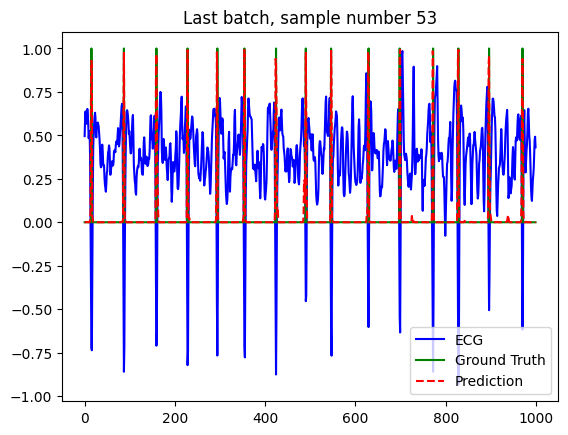

100%|██████████| 119/119 [00:06<00:00, 17.46it/s]


Learning rate:  [0.001]

Train Loss: 0.0423
Train Weighted Accuracy: 0.99730
Train F1 Score: 0.97150
Train TPR: 0.99529
Train FPR: 0.00069
Train TNR: 0.99931
Train FNR: 0.00471



100%|██████████| 20/20 [00:00<00:00, 28.36it/s]



Validation Loss: 0.0455
Validation Weighted Accuracy: 0.99729
Validation F1 Score: 0.97165
Validation TPR: 0.99527
Validation FPR: 0.00069
Validation TNR: 0.99931
Validation FNR: 0.00473

====Epoch [19/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.78it/s]

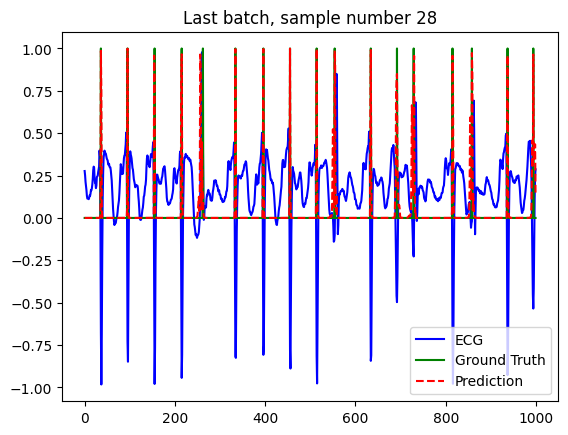

100%|██████████| 119/119 [00:06<00:00, 17.78it/s]


Learning rate:  [0.001]

Train Loss: 0.0420
Train Weighted Accuracy: 0.99733
Train F1 Score: 0.97158
Train TPR: 0.99535
Train FPR: 0.00069
Train TNR: 0.99931
Train FNR: 0.00465



100%|██████████| 20/20 [00:00<00:00, 26.79it/s]



Validation Loss: 0.0454
Validation Weighted Accuracy: 0.99727
Validation F1 Score: 0.97186
Validation TPR: 0.99523
Validation FPR: 0.00068
Validation TNR: 0.99932
Validation FNR: 0.00477

====Epoch [20/100]====


 98%|█████████▊| 117/119 [00:06<00:00, 19.67it/s]

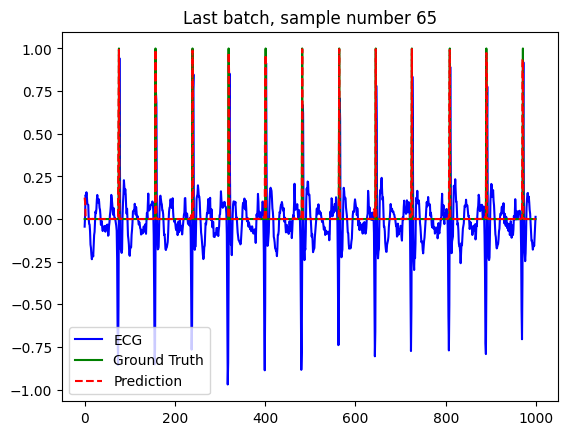

100%|██████████| 119/119 [00:06<00:00, 17.65it/s]


Learning rate:  [0.001]

Train Loss: 0.0418
Train Weighted Accuracy: 0.99735
Train F1 Score: 0.97167
Train TPR: 0.99539
Train FPR: 0.00069
Train TNR: 0.99931
Train FNR: 0.00461



100%|██████████| 20/20 [00:00<00:00, 28.27it/s]



Validation Loss: 0.0452
Validation Weighted Accuracy: 0.99731
Validation F1 Score: 0.97197
Validation TPR: 0.99531
Validation FPR: 0.00068
Validation TNR: 0.99932
Validation FNR: 0.00469

====Epoch [21/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.96it/s]

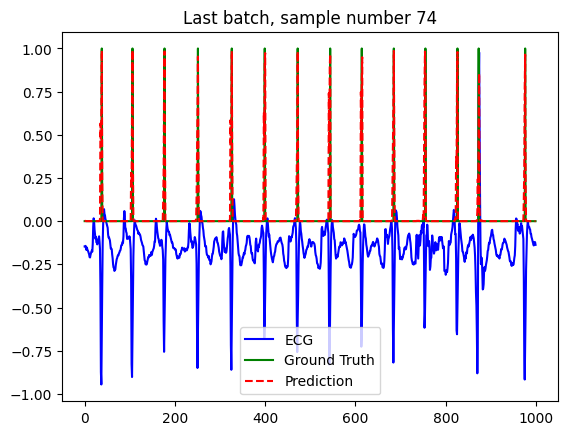

100%|██████████| 119/119 [00:06<00:00, 17.81it/s]


Learning rate:  [0.001]

Train Loss: 0.0416
Train Weighted Accuracy: 0.99737
Train F1 Score: 0.97172
Train TPR: 0.99542
Train FPR: 0.00069
Train TNR: 0.99931
Train FNR: 0.00458



100%|██████████| 20/20 [00:00<00:00, 27.97it/s]



Validation Loss: 0.0451
Validation Weighted Accuracy: 0.99731
Validation F1 Score: 0.97197
Validation TPR: 0.99531
Validation FPR: 0.00068
Validation TNR: 0.99932
Validation FNR: 0.00469

====Epoch [22/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.90it/s]

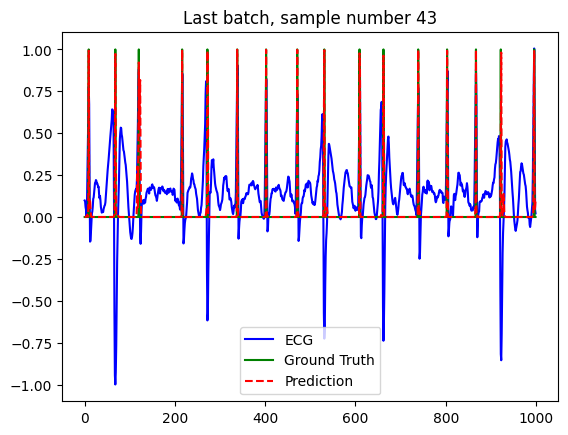

100%|██████████| 119/119 [00:06<00:00, 17.25it/s]


Learning rate:  [0.001]

Train Loss: 0.0414
Train Weighted Accuracy: 0.99738
Train F1 Score: 0.97183
Train TPR: 0.99544
Train FPR: 0.00068
Train TNR: 0.99932
Train FNR: 0.00456



100%|██████████| 20/20 [00:00<00:00, 28.74it/s]



Validation Loss: 0.0450
Validation Weighted Accuracy: 0.99725
Validation F1 Score: 0.97178
Validation TPR: 0.99519
Validation FPR: 0.00068
Validation TNR: 0.99932
Validation FNR: 0.00481

====Epoch [23/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.77it/s]

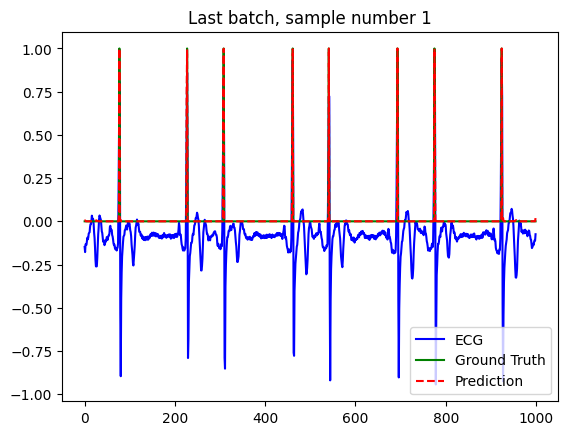

100%|██████████| 119/119 [00:06<00:00, 18.11it/s]


Learning rate:  [0.001]

Train Loss: 0.0412
Train Weighted Accuracy: 0.99738
Train F1 Score: 0.97182
Train TPR: 0.99544
Train FPR: 0.00068
Train TNR: 0.99932
Train FNR: 0.00456



100%|██████████| 20/20 [00:00<00:00, 26.14it/s]



Validation Loss: 0.0449
Validation Weighted Accuracy: 0.99725
Validation F1 Score: 0.97169
Validation TPR: 0.99519
Validation FPR: 0.00068
Validation TNR: 0.99932
Validation FNR: 0.00481

====Epoch [24/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.91it/s]

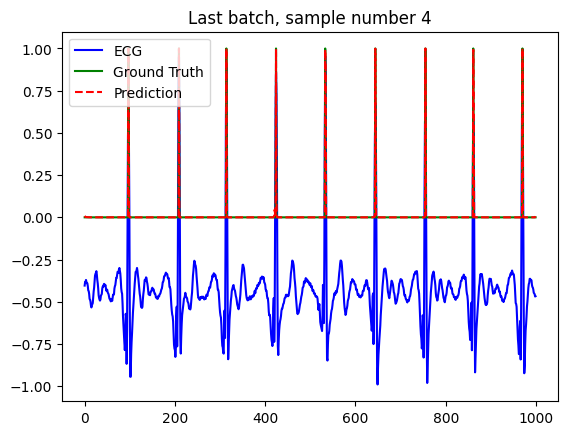

100%|██████████| 119/119 [00:06<00:00, 18.11it/s]


Learning rate:  [0.001]

Train Loss: 0.0410
Train Weighted Accuracy: 0.99739
Train F1 Score: 0.97186
Train TPR: 0.99547
Train FPR: 0.00068
Train TNR: 0.99932
Train FNR: 0.00453



100%|██████████| 20/20 [00:00<00:00, 28.81it/s]



Validation Loss: 0.0448
Validation Weighted Accuracy: 0.99721
Validation F1 Score: 0.97159
Validation TPR: 0.99511
Validation FPR: 0.00069
Validation TNR: 0.99931
Validation FNR: 0.00489

====Epoch [25/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.83it/s]

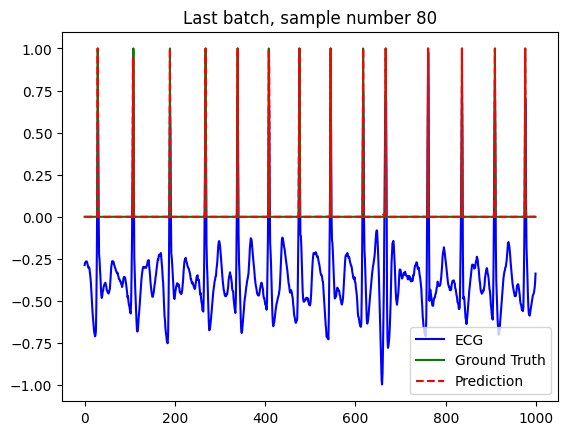

100%|██████████| 119/119 [00:06<00:00, 17.68it/s]


Learning rate:  [0.0001]

Train Loss: 0.0408
Train Weighted Accuracy: 0.99741
Train F1 Score: 0.97188
Train TPR: 0.99550
Train FPR: 0.00068
Train TNR: 0.99932
Train FNR: 0.00450



100%|██████████| 20/20 [00:00<00:00, 28.29it/s]



Validation Loss: 0.0448
Validation Weighted Accuracy: 0.99717
Validation F1 Score: 0.97159
Validation TPR: 0.99503
Validation FPR: 0.00068
Validation TNR: 0.99932
Validation FNR: 0.00497

====Epoch [26/100]====


 97%|█████████▋| 116/119 [00:06<00:00, 19.60it/s]

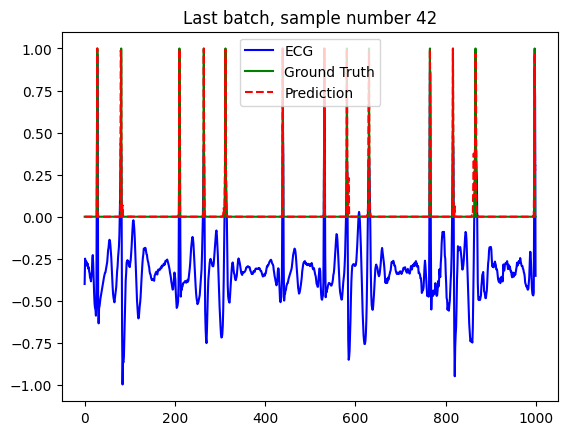

100%|██████████| 119/119 [00:06<00:00, 17.75it/s]


Learning rate:  [0.0001]

Train Loss: 0.0404
Train Weighted Accuracy: 0.99743
Train F1 Score: 0.97214
Train TPR: 0.99554
Train FPR: 0.00068
Train TNR: 0.99932
Train FNR: 0.00446



100%|██████████| 20/20 [00:00<00:00, 29.81it/s]



Validation Loss: 0.0445
Validation Weighted Accuracy: 0.99724
Validation F1 Score: 0.97208
Validation TPR: 0.99515
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00485

====Epoch [27/100]====


 98%|█████████▊| 117/119 [00:06<00:00, 19.88it/s]

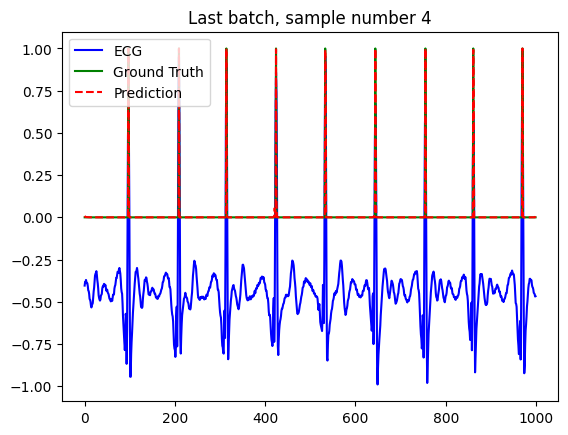

100%|██████████| 119/119 [00:06<00:00, 17.75it/s]


Learning rate:  [0.0001]

Train Loss: 0.0403
Train Weighted Accuracy: 0.99748
Train F1 Score: 0.97237
Train TPR: 0.99564
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00436



100%|██████████| 20/20 [00:00<00:00, 28.33it/s]



Validation Loss: 0.0445
Validation Weighted Accuracy: 0.99720
Validation F1 Score: 0.97210
Validation TPR: 0.99507
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00493

====Epoch [28/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.93it/s]

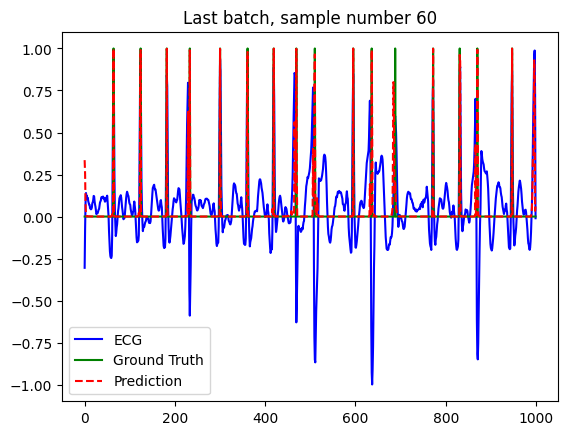

100%|██████████| 119/119 [00:06<00:00, 17.85it/s]


Learning rate:  [0.0001]

Train Loss: 0.0402
Train Weighted Accuracy: 0.99747
Train F1 Score: 0.97236
Train TPR: 0.99561
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00439



100%|██████████| 20/20 [00:00<00:00, 27.10it/s]



Validation Loss: 0.0444
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97189
Validation TPR: 0.99511
Validation FPR: 0.00068
Validation TNR: 0.99932
Validation FNR: 0.00489

====Epoch [29/100]====


 98%|█████████▊| 117/119 [00:06<00:00, 19.89it/s]

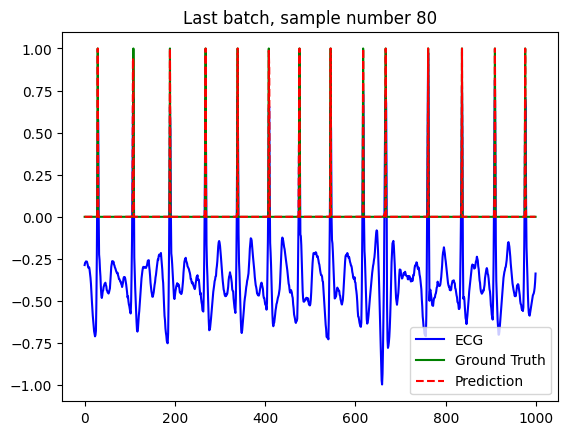

100%|██████████| 119/119 [00:06<00:00, 17.66it/s]


Learning rate:  [0.0001]

Train Loss: 0.0402
Train Weighted Accuracy: 0.99748
Train F1 Score: 0.97235
Train TPR: 0.99562
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00438



100%|██████████| 20/20 [00:00<00:00, 27.17it/s]



Validation Loss: 0.0444
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97201
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [30/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.86it/s]

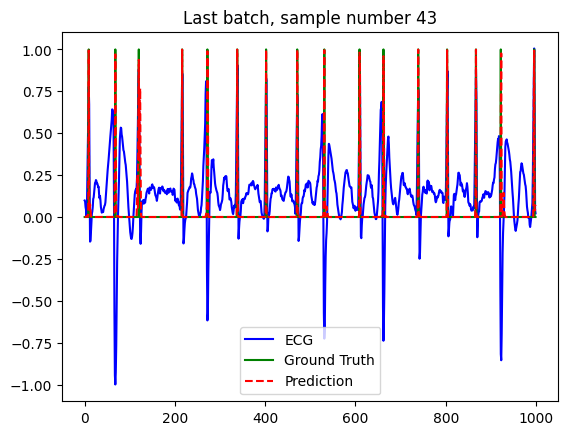

100%|██████████| 119/119 [00:06<00:00, 17.39it/s]


Learning rate:  [0.0001]

Train Loss: 0.0402
Train Weighted Accuracy: 0.99749
Train F1 Score: 0.97238
Train TPR: 0.99564
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00436



100%|██████████| 20/20 [00:00<00:00, 26.83it/s]



Validation Loss: 0.0444
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97212
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [31/100]====


 97%|█████████▋| 116/119 [00:06<00:00, 19.37it/s]

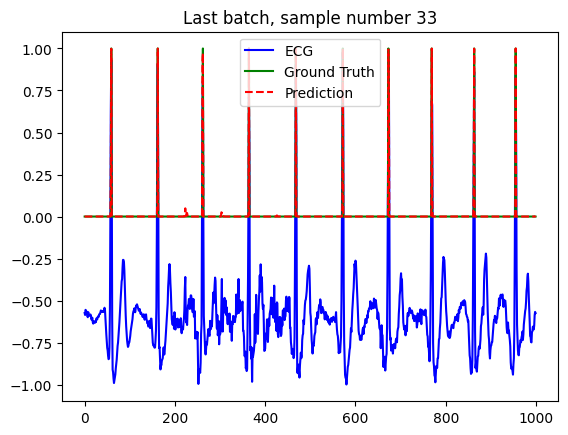

100%|██████████| 119/119 [00:06<00:00, 18.06it/s]


Learning rate:  [0.0001]

Train Loss: 0.0402
Train Weighted Accuracy: 0.99749
Train F1 Score: 0.97236
Train TPR: 0.99566
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00434



100%|██████████| 20/20 [00:00<00:00, 27.74it/s]



Validation Loss: 0.0444
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97208
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [32/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.94it/s]

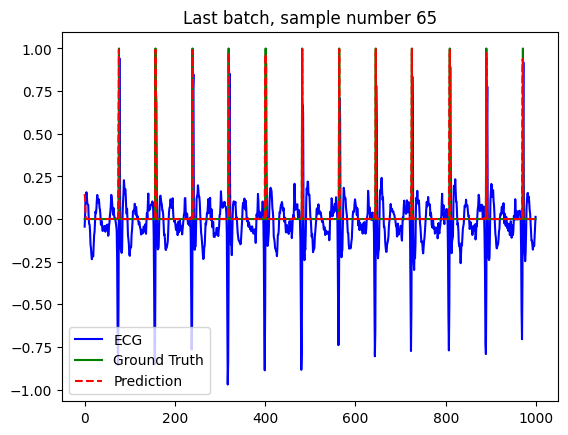

100%|██████████| 119/119 [00:06<00:00, 17.35it/s]


Learning rate:  [0.0001]

Train Loss: 0.0401
Train Weighted Accuracy: 0.99750
Train F1 Score: 0.97235
Train TPR: 0.99568
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00432



100%|██████████| 20/20 [00:00<00:00, 29.85it/s]



Validation Loss: 0.0444
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97208
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [33/100]====


 97%|█████████▋| 116/119 [00:06<00:00, 19.77it/s]

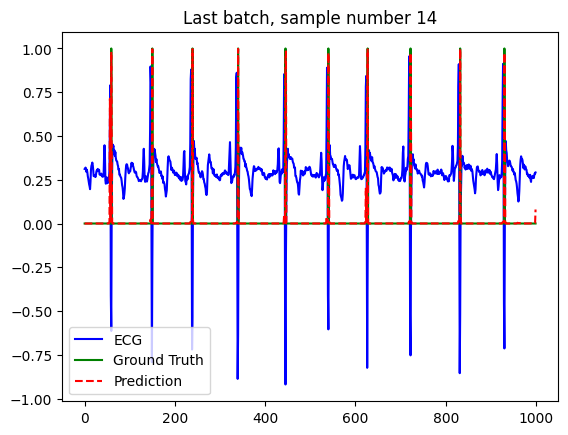

100%|██████████| 119/119 [00:06<00:00, 18.17it/s]


Learning rate:  [0.0001]

Train Loss: 0.0401
Train Weighted Accuracy: 0.99749
Train F1 Score: 0.97231
Train TPR: 0.99566
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00434



100%|██████████| 20/20 [00:00<00:00, 31.40it/s]



Validation Loss: 0.0444
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97212
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [34/100]====


 98%|█████████▊| 117/119 [00:06<00:00, 19.65it/s]

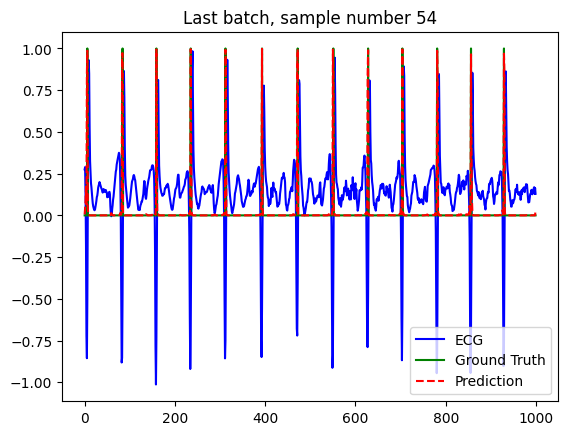

100%|██████████| 119/119 [00:06<00:00, 17.37it/s]


Learning rate:  [0.0001]

Train Loss: 0.0401
Train Weighted Accuracy: 0.99749
Train F1 Score: 0.97233
Train TPR: 0.99566
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00434



100%|██████████| 20/20 [00:00<00:00, 29.10it/s]



Validation Loss: 0.0444
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97216
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [35/100]====


 98%|█████████▊| 117/119 [00:06<00:00, 19.53it/s]

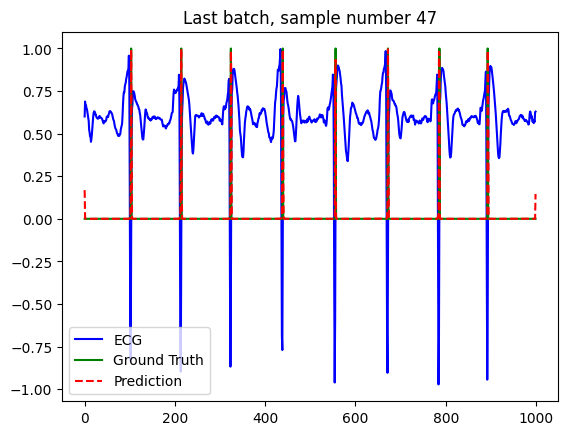

100%|██████████| 119/119 [00:06<00:00, 17.58it/s]


Learning rate:  [0.0001]

Train Loss: 0.0401
Train Weighted Accuracy: 0.99749
Train F1 Score: 0.97233
Train TPR: 0.99566
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00434



100%|██████████| 20/20 [00:00<00:00, 30.30it/s]



Validation Loss: 0.0443
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97216
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [36/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.96it/s]

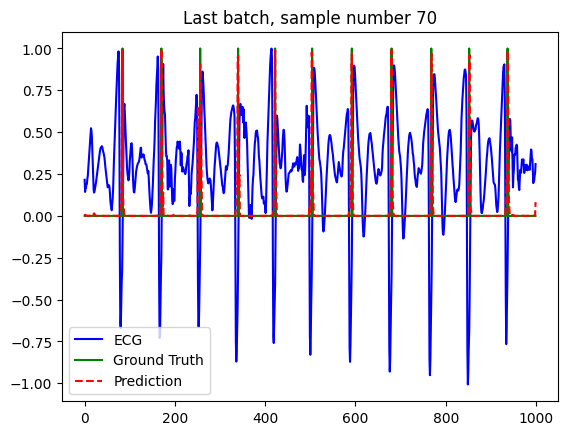

100%|██████████| 119/119 [00:06<00:00, 17.82it/s]


Learning rate:  [0.0001]

Train Loss: 0.0401
Train Weighted Accuracy: 0.99750
Train F1 Score: 0.97234
Train TPR: 0.99566
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00434



100%|██████████| 20/20 [00:00<00:00, 27.94it/s]



Validation Loss: 0.0443
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97218
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [37/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.95it/s]

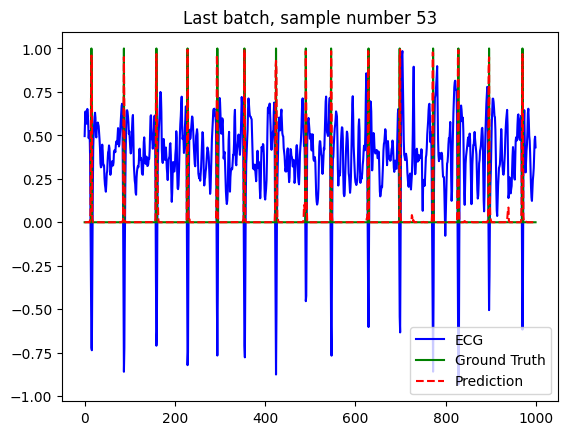

100%|██████████| 119/119 [00:06<00:00, 17.46it/s]


Learning rate:  [0.0001]

Train Loss: 0.0400
Train Weighted Accuracy: 0.99750
Train F1 Score: 0.97237
Train TPR: 0.99566
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00434



100%|██████████| 20/20 [00:00<00:00, 31.63it/s]



Validation Loss: 0.0443
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97218
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [38/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.80it/s]

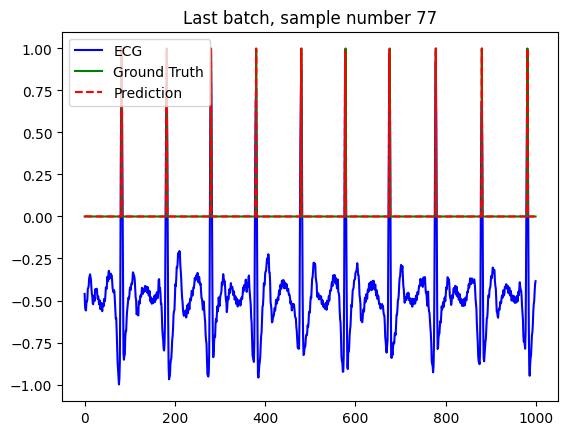

100%|██████████| 119/119 [00:06<00:00, 17.98it/s]


Learning rate:  [0.0001]

Train Loss: 0.0400
Train Weighted Accuracy: 0.99750
Train F1 Score: 0.97238
Train TPR: 0.99567
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00433



100%|██████████| 20/20 [00:00<00:00, 28.35it/s]



Validation Loss: 0.0443
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97220
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [39/100]====


 98%|█████████▊| 117/119 [00:06<00:00, 19.87it/s]

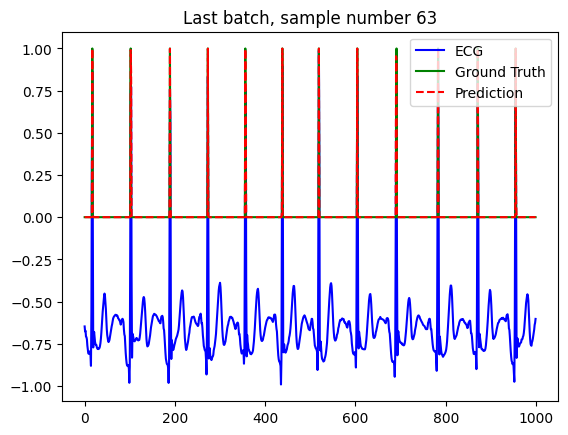

100%|██████████| 119/119 [00:06<00:00, 17.61it/s]


Learning rate:  [0.0001]

Train Loss: 0.0400
Train Weighted Accuracy: 0.99750
Train F1 Score: 0.97242
Train TPR: 0.99567
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00433



100%|██████████| 20/20 [00:00<00:00, 30.63it/s]



Validation Loss: 0.0443
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97220
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [40/100]====


 98%|█████████▊| 117/119 [00:06<00:00, 19.49it/s]

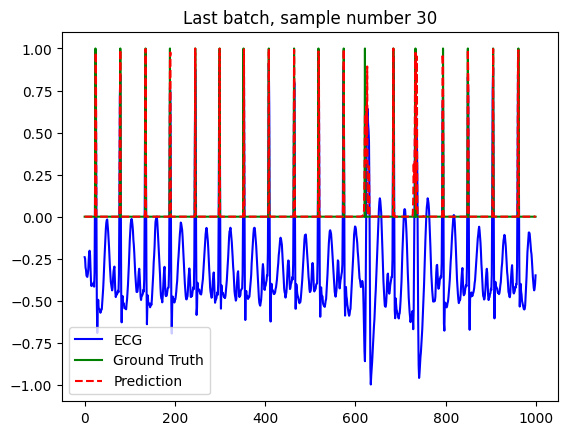

100%|██████████| 119/119 [00:06<00:00, 17.92it/s]


Learning rate:  [0.0001]

Train Loss: 0.0400
Train Weighted Accuracy: 0.99750
Train F1 Score: 0.97244
Train TPR: 0.99568
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00432



100%|██████████| 20/20 [00:00<00:00, 28.19it/s]



Validation Loss: 0.0443
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97218
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [41/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.92it/s]

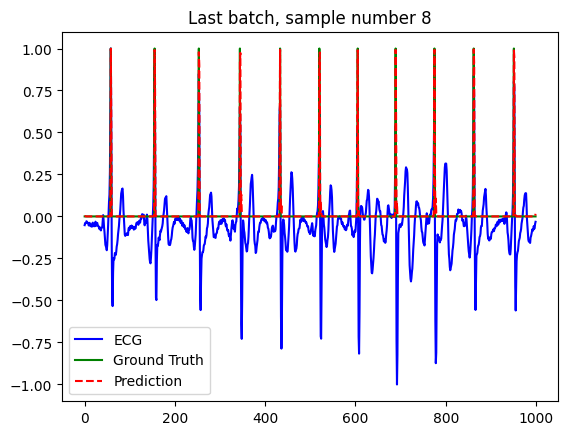

100%|██████████| 119/119 [00:06<00:00, 17.40it/s]


Learning rate:  [0.0001]

Train Loss: 0.0400
Train Weighted Accuracy: 0.99750
Train F1 Score: 0.97245
Train TPR: 0.99568
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00432



100%|██████████| 20/20 [00:00<00:00, 28.91it/s]



Validation Loss: 0.0443
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97225
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [42/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.95it/s]

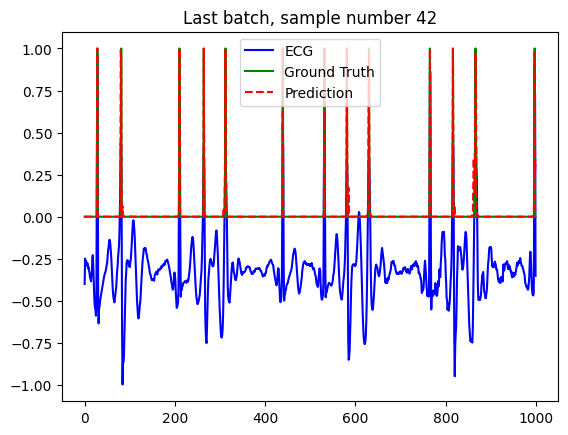

100%|██████████| 119/119 [00:06<00:00, 17.41it/s]


Learning rate:  [0.0001]

Train Loss: 0.0399
Train Weighted Accuracy: 0.99751
Train F1 Score: 0.97246
Train TPR: 0.99570
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00430



100%|██████████| 20/20 [00:00<00:00, 29.85it/s]



Validation Loss: 0.0443
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97225
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [43/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.85it/s]

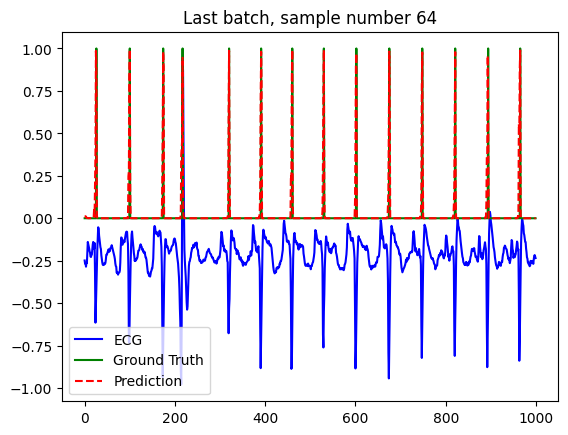

100%|██████████| 119/119 [00:06<00:00, 17.80it/s]


Learning rate:  [0.0001]

Train Loss: 0.0399
Train Weighted Accuracy: 0.99751
Train F1 Score: 0.97248
Train TPR: 0.99569
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00431



100%|██████████| 20/20 [00:00<00:00, 28.53it/s]



Validation Loss: 0.0443
Validation Weighted Accuracy: 0.99720
Validation F1 Score: 0.97225
Validation TPR: 0.99507
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00493

====Epoch [44/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.94it/s]

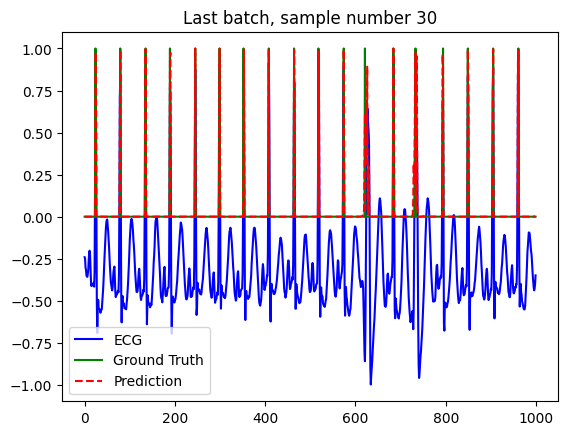

100%|██████████| 119/119 [00:06<00:00, 17.59it/s]


Learning rate:  [0.0001]

Train Loss: 0.0399
Train Weighted Accuracy: 0.99751
Train F1 Score: 0.97250
Train TPR: 0.99569
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00431



100%|██████████| 20/20 [00:00<00:00, 29.76it/s]



Validation Loss: 0.0443
Validation Weighted Accuracy: 0.99720
Validation F1 Score: 0.97223
Validation TPR: 0.99507
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00493

====Epoch [45/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.85it/s]

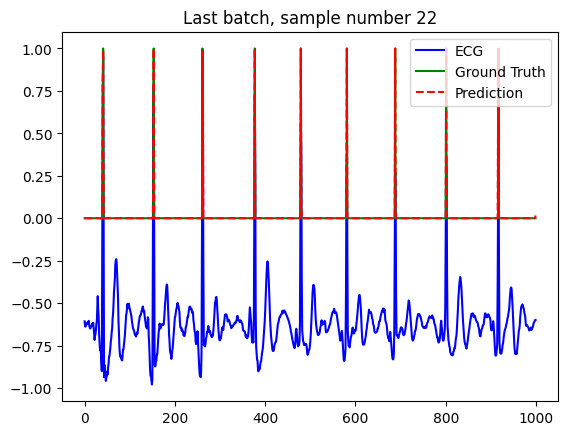

100%|██████████| 119/119 [00:06<00:00, 17.83it/s]


Learning rate:  [0.0001]

Train Loss: 0.0399
Train Weighted Accuracy: 0.99751
Train F1 Score: 0.97251
Train TPR: 0.99570
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00430



100%|██████████| 20/20 [00:00<00:00, 29.80it/s]



Validation Loss: 0.0443
Validation Weighted Accuracy: 0.99720
Validation F1 Score: 0.97227
Validation TPR: 0.99507
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00493

====Epoch [46/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.94it/s]

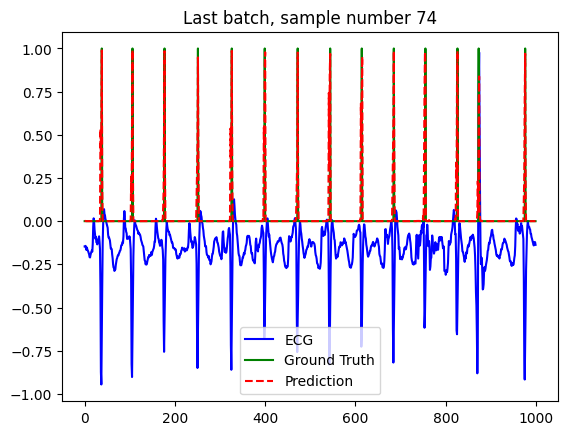

100%|██████████| 119/119 [00:07<00:00, 16.91it/s]


Learning rate:  [0.0001]

Train Loss: 0.0399
Train Weighted Accuracy: 0.99752
Train F1 Score: 0.97251
Train TPR: 0.99570
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00430



100%|██████████| 20/20 [00:00<00:00, 30.31it/s]



Validation Loss: 0.0443
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97233
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [47/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.92it/s]

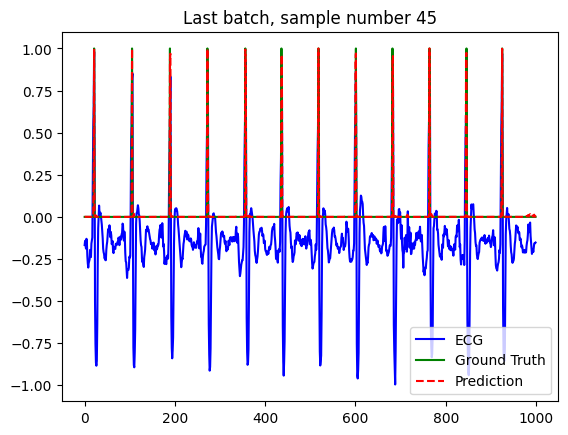

100%|██████████| 119/119 [00:06<00:00, 17.82it/s]


Learning rate:  [0.0001]

Train Loss: 0.0398
Train Weighted Accuracy: 0.99752
Train F1 Score: 0.97250
Train TPR: 0.99571
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00429



100%|██████████| 20/20 [00:00<00:00, 25.81it/s]



Validation Loss: 0.0443
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97231
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [48/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.06it/s]

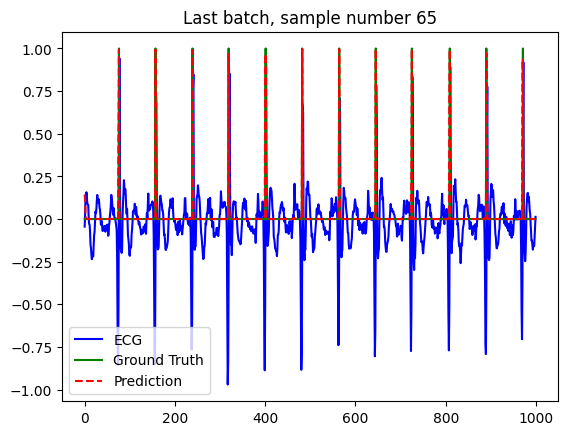

100%|██████████| 119/119 [00:06<00:00, 17.89it/s]


Learning rate:  [0.0001]

Train Loss: 0.0398
Train Weighted Accuracy: 0.99752
Train F1 Score: 0.97249
Train TPR: 0.99571
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00429



100%|██████████| 20/20 [00:00<00:00, 27.78it/s]



Validation Loss: 0.0442
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97233
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [49/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.93it/s]

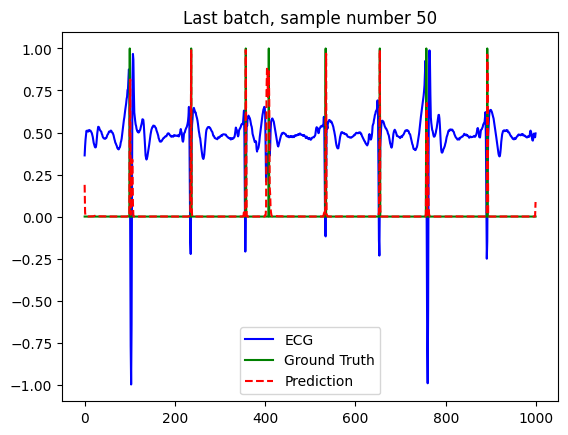

100%|██████████| 119/119 [00:06<00:00, 17.69it/s]


Learning rate:  [0.0001]

Train Loss: 0.0398
Train Weighted Accuracy: 0.99752
Train F1 Score: 0.97251
Train TPR: 0.99570
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00430



100%|██████████| 20/20 [00:00<00:00, 29.22it/s]



Validation Loss: 0.0442
Validation Weighted Accuracy: 0.99720
Validation F1 Score: 0.97238
Validation TPR: 0.99507
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00493

====Epoch [50/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.91it/s]

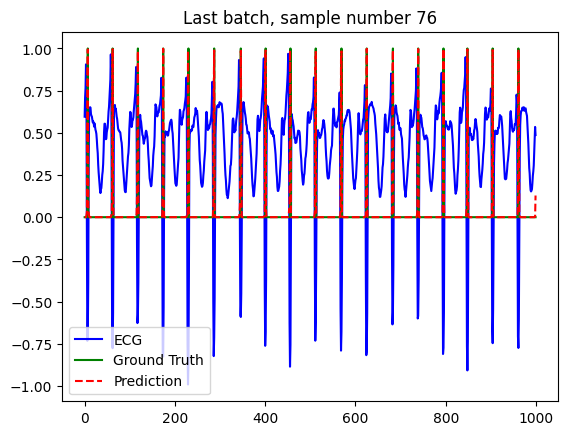

100%|██████████| 119/119 [00:06<00:00, 17.83it/s]


Learning rate:  [0.0001]

Train Loss: 0.0398
Train Weighted Accuracy: 0.99752
Train F1 Score: 0.97250
Train TPR: 0.99570
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00430



100%|██████████| 20/20 [00:00<00:00, 29.84it/s]



Validation Loss: 0.0442
Validation Weighted Accuracy: 0.99718
Validation F1 Score: 0.97242
Validation TPR: 0.99503
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00497

====Epoch [51/100]====


 98%|█████████▊| 117/119 [00:06<00:00, 19.78it/s]

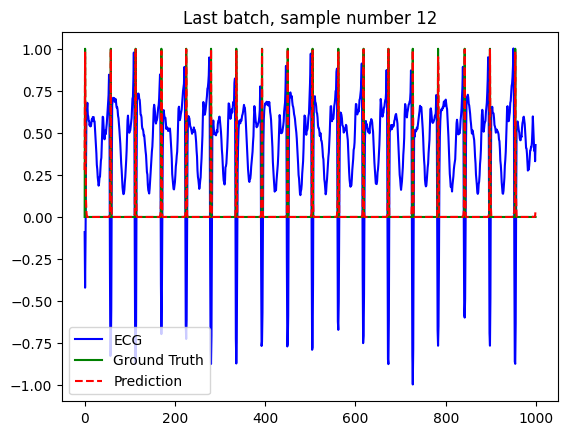

100%|██████████| 119/119 [00:06<00:00, 17.68it/s]


Learning rate:  [0.0001]

Train Loss: 0.0398
Train Weighted Accuracy: 0.99752
Train F1 Score: 0.97252
Train TPR: 0.99571
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00429



100%|██████████| 20/20 [00:00<00:00, 27.01it/s]



Validation Loss: 0.0442
Validation Weighted Accuracy: 0.99718
Validation F1 Score: 0.97238
Validation TPR: 0.99503
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00497

====Epoch [52/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.90it/s]

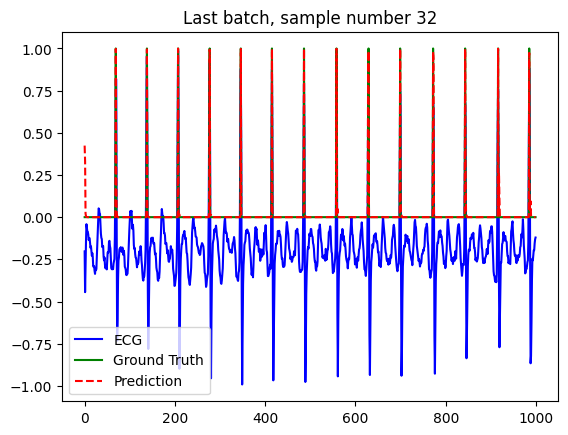

100%|██████████| 119/119 [00:06<00:00, 17.80it/s]


Learning rate:  [0.0001]

Train Loss: 0.0397
Train Weighted Accuracy: 0.99753
Train F1 Score: 0.97252
Train TPR: 0.99572
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00428



100%|██████████| 20/20 [00:00<00:00, 26.95it/s]



Validation Loss: 0.0442
Validation Weighted Accuracy: 0.99720
Validation F1 Score: 0.97240
Validation TPR: 0.99507
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00493

====Epoch [53/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.98it/s]

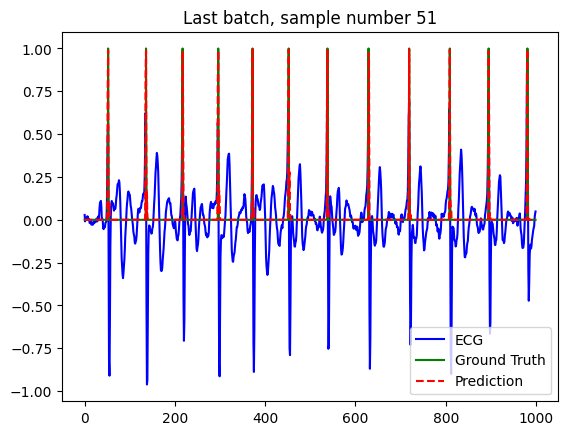

100%|██████████| 119/119 [00:06<00:00, 18.06it/s]


Learning rate:  [0.0001]

Train Loss: 0.0397
Train Weighted Accuracy: 0.99753
Train F1 Score: 0.97255
Train TPR: 0.99572
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00428



100%|██████████| 20/20 [00:00<00:00, 29.82it/s]



Validation Loss: 0.0442
Validation Weighted Accuracy: 0.99720
Validation F1 Score: 0.97246
Validation TPR: 0.99507
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00493

====Epoch [54/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.61it/s]

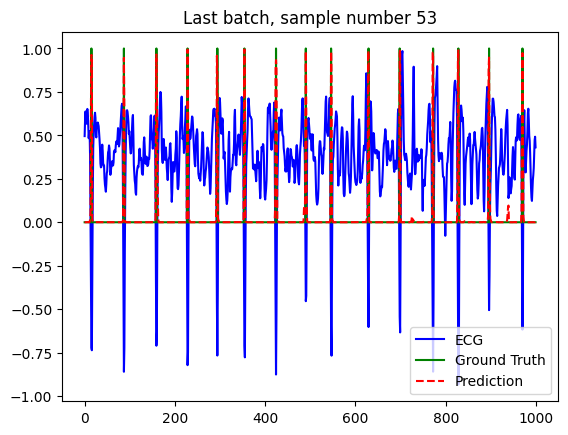

100%|██████████| 119/119 [00:06<00:00, 17.26it/s]


Learning rate:  [0.0001]

Train Loss: 0.0397
Train Weighted Accuracy: 0.99753
Train F1 Score: 0.97252
Train TPR: 0.99572
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00428



100%|██████████| 20/20 [00:00<00:00, 26.77it/s]



Validation Loss: 0.0442
Validation Weighted Accuracy: 0.99720
Validation F1 Score: 0.97248
Validation TPR: 0.99507
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00493

====Epoch [55/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.95it/s]

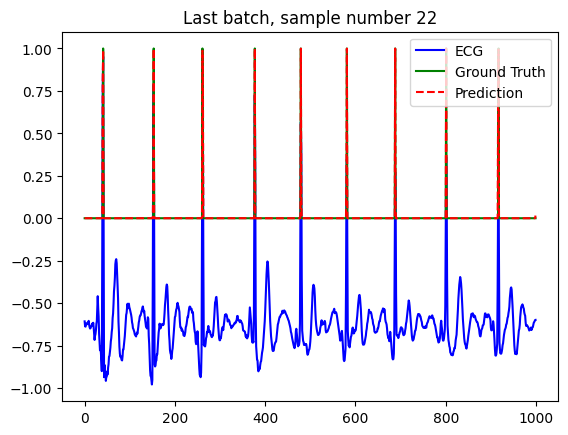

100%|██████████| 119/119 [00:06<00:00, 18.07it/s]


Learning rate:  [0.0001]

Train Loss: 0.0397
Train Weighted Accuracy: 0.99753
Train F1 Score: 0.97250
Train TPR: 0.99572
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00428



100%|██████████| 20/20 [00:00<00:00, 26.80it/s]



Validation Loss: 0.0442
Validation Weighted Accuracy: 0.99720
Validation F1 Score: 0.97242
Validation TPR: 0.99507
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00493

====Epoch [56/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.91it/s]

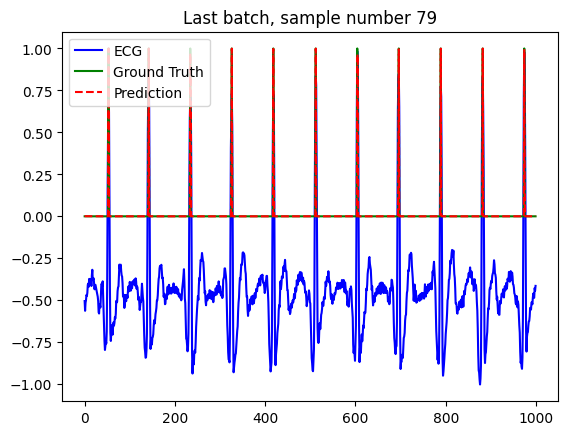

100%|██████████| 119/119 [00:06<00:00, 17.57it/s]


Learning rate:  [0.0001]

Train Loss: 0.0397
Train Weighted Accuracy: 0.99753
Train F1 Score: 0.97253
Train TPR: 0.99574
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00426



100%|██████████| 20/20 [00:00<00:00, 28.61it/s]



Validation Loss: 0.0442
Validation Weighted Accuracy: 0.99720
Validation F1 Score: 0.97244
Validation TPR: 0.99507
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00493

====Epoch [57/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.89it/s]

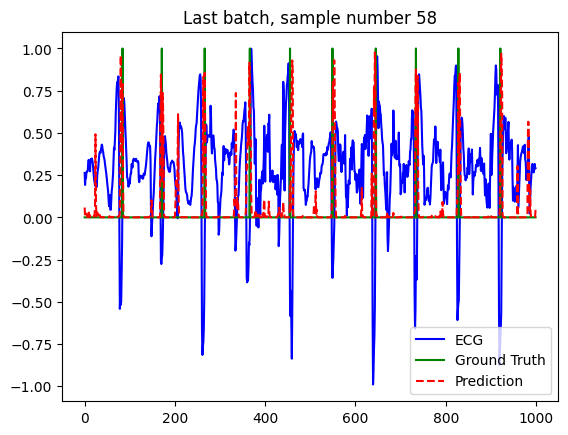

100%|██████████| 119/119 [00:06<00:00, 17.78it/s]


Learning rate:  [0.0001]

Train Loss: 0.0396
Train Weighted Accuracy: 0.99754
Train F1 Score: 0.97256
Train TPR: 0.99574
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00426



100%|██████████| 20/20 [00:00<00:00, 26.11it/s]



Validation Loss: 0.0442
Validation Weighted Accuracy: 0.99720
Validation F1 Score: 0.97246
Validation TPR: 0.99507
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00493

====Epoch [58/100]====


 98%|█████████▊| 117/119 [00:06<00:00, 19.83it/s]

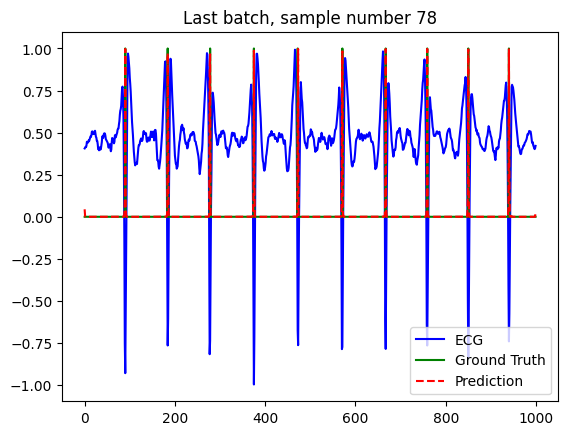

100%|██████████| 119/119 [00:06<00:00, 18.23it/s]


Learning rate:  [0.0001]

Train Loss: 0.0396
Train Weighted Accuracy: 0.99754
Train F1 Score: 0.97256
Train TPR: 0.99574
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00426



100%|██████████| 20/20 [00:00<00:00, 28.04it/s]



Validation Loss: 0.0442
Validation Weighted Accuracy: 0.99720
Validation F1 Score: 0.97244
Validation TPR: 0.99507
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00493

====Epoch [59/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.91it/s]

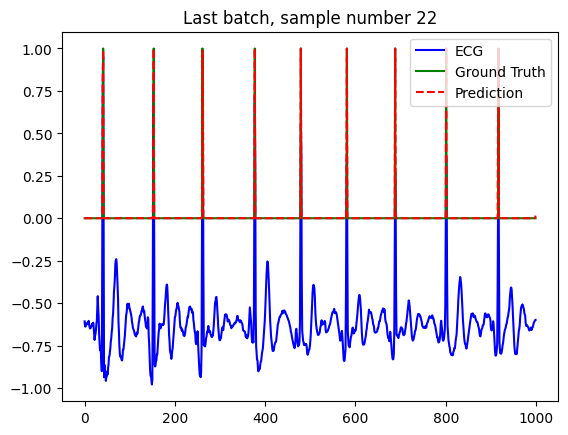

100%|██████████| 119/119 [00:06<00:00, 17.79it/s]


Learning rate:  [0.0001]

Train Loss: 0.0396
Train Weighted Accuracy: 0.99754
Train F1 Score: 0.97255
Train TPR: 0.99574
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00426



100%|██████████| 20/20 [00:00<00:00, 29.12it/s]



Validation Loss: 0.0442
Validation Weighted Accuracy: 0.99720
Validation F1 Score: 0.97246
Validation TPR: 0.99507
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00493

====Epoch [60/100]====


 98%|█████████▊| 117/119 [00:06<00:00, 19.88it/s]

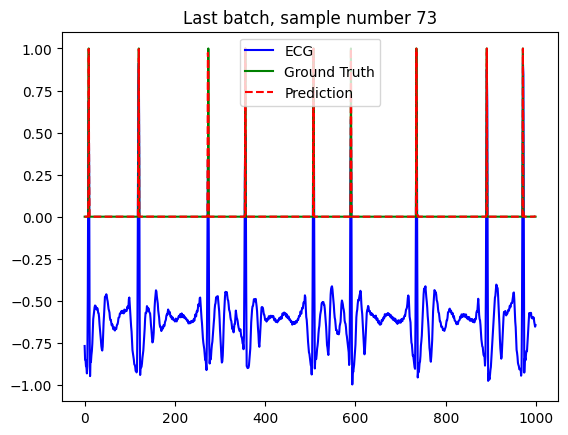

100%|██████████| 119/119 [00:06<00:00, 17.80it/s]


Learning rate:  [0.0001]

Train Loss: 0.0396
Train Weighted Accuracy: 0.99754
Train F1 Score: 0.97256
Train TPR: 0.99574
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00426



100%|██████████| 20/20 [00:00<00:00, 26.42it/s]



Validation Loss: 0.0441
Validation Weighted Accuracy: 0.99720
Validation F1 Score: 0.97244
Validation TPR: 0.99507
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00493

====Epoch [61/100]====


 98%|█████████▊| 117/119 [00:06<00:00, 19.76it/s]

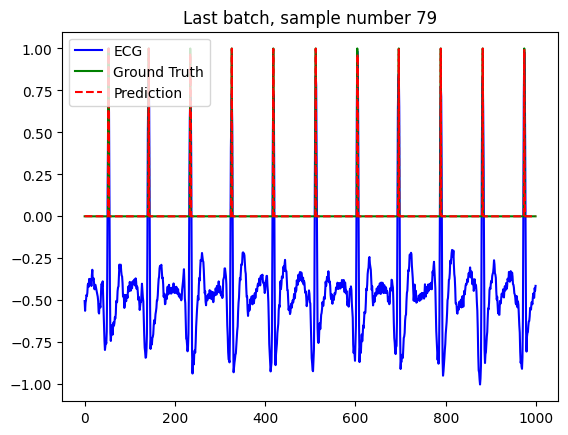

100%|██████████| 119/119 [00:06<00:00, 17.45it/s]


Learning rate:  [0.0001]

Train Loss: 0.0396
Train Weighted Accuracy: 0.99753
Train F1 Score: 0.97258
Train TPR: 0.99573
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00427



100%|██████████| 20/20 [00:00<00:00, 27.21it/s]



Validation Loss: 0.0441
Validation Weighted Accuracy: 0.99720
Validation F1 Score: 0.97246
Validation TPR: 0.99507
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00493

====Epoch [62/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.96it/s]

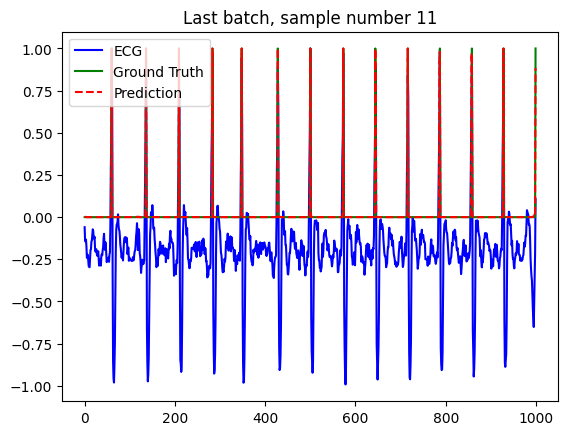

100%|██████████| 119/119 [00:06<00:00, 18.20it/s]


Learning rate:  [0.0001]

Train Loss: 0.0396
Train Weighted Accuracy: 0.99754
Train F1 Score: 0.97258
Train TPR: 0.99574
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00426



100%|██████████| 20/20 [00:00<00:00, 29.47it/s]



Validation Loss: 0.0441
Validation Weighted Accuracy: 0.99720
Validation F1 Score: 0.97246
Validation TPR: 0.99507
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00493

====Epoch [63/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.84it/s]

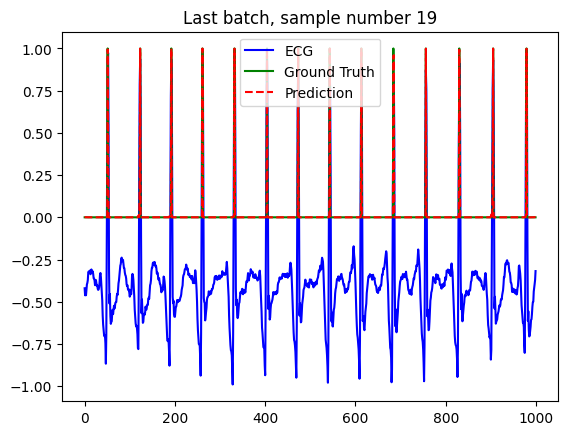

100%|██████████| 119/119 [00:06<00:00, 17.71it/s]


Learning rate:  [0.0001]

Train Loss: 0.0395
Train Weighted Accuracy: 0.99754
Train F1 Score: 0.97265
Train TPR: 0.99574
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00426



100%|██████████| 20/20 [00:00<00:00, 25.60it/s]



Validation Loss: 0.0441
Validation Weighted Accuracy: 0.99720
Validation F1 Score: 0.97252
Validation TPR: 0.99507
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00493

====Epoch [64/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.87it/s]

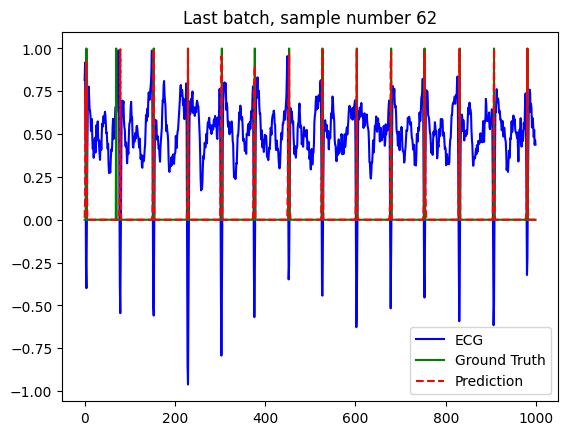

100%|██████████| 119/119 [00:06<00:00, 17.82it/s]


Learning rate:  [0.0001]

Train Loss: 0.0395
Train Weighted Accuracy: 0.99754
Train F1 Score: 0.97262
Train TPR: 0.99574
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00426



100%|██████████| 20/20 [00:00<00:00, 28.60it/s]



Validation Loss: 0.0441
Validation Weighted Accuracy: 0.99720
Validation F1 Score: 0.97250
Validation TPR: 0.99507
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00493

====Epoch [65/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.94it/s]

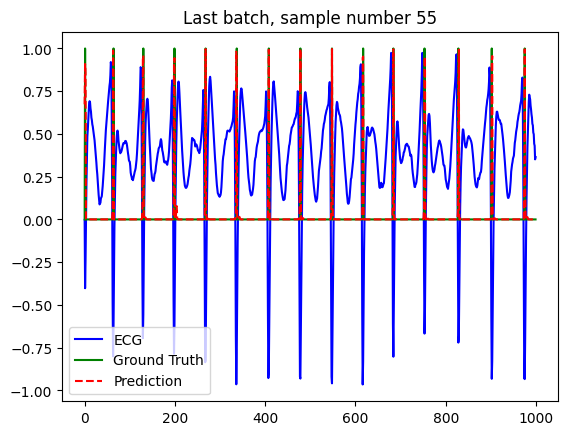

100%|██████████| 119/119 [00:06<00:00, 17.96it/s]


Learning rate:  [0.0001]

Train Loss: 0.0395
Train Weighted Accuracy: 0.99754
Train F1 Score: 0.97262
Train TPR: 0.99574
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00426



100%|██████████| 20/20 [00:00<00:00, 27.81it/s]



Validation Loss: 0.0441
Validation Weighted Accuracy: 0.99720
Validation F1 Score: 0.97244
Validation TPR: 0.99507
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00493

====Epoch [66/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.90it/s]

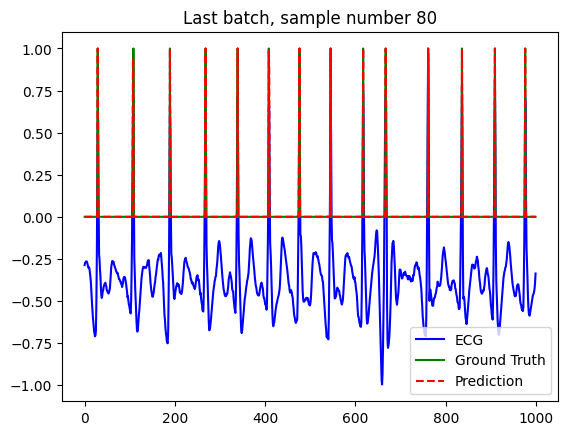

100%|██████████| 119/119 [00:06<00:00, 17.59it/s]


Learning rate:  [0.0001]

Train Loss: 0.0395
Train Weighted Accuracy: 0.99754
Train F1 Score: 0.97262
Train TPR: 0.99575
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00425



100%|██████████| 20/20 [00:00<00:00, 26.20it/s]



Validation Loss: 0.0441
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97233
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [67/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.86it/s]

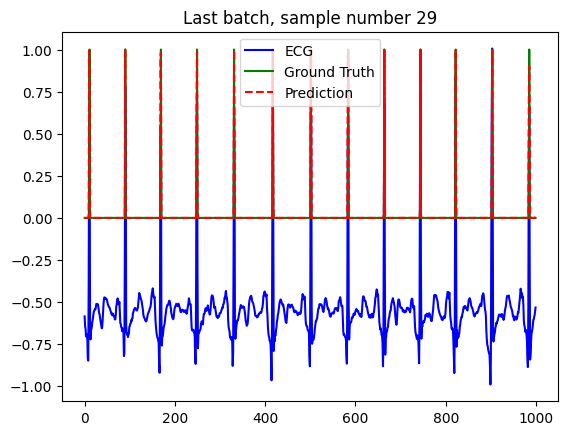

100%|██████████| 119/119 [00:06<00:00, 18.19it/s]


Learning rate:  [0.0001]

Train Loss: 0.0395
Train Weighted Accuracy: 0.99755
Train F1 Score: 0.97262
Train TPR: 0.99576
Train FPR: 0.00067
Train TNR: 0.99933
Train FNR: 0.00424



100%|██████████| 20/20 [00:00<00:00, 26.30it/s]



Validation Loss: 0.0441
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97229
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [68/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.99it/s]

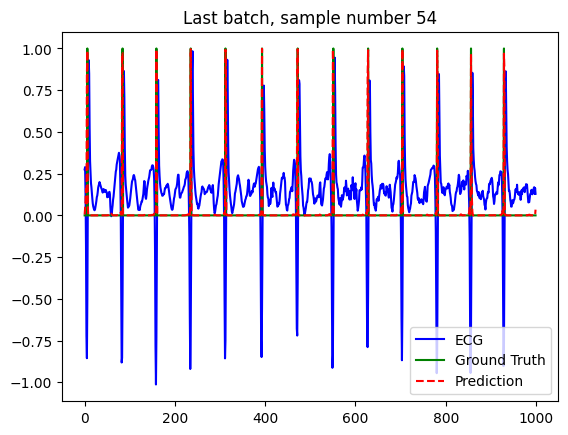

100%|██████████| 119/119 [00:06<00:00, 17.49it/s]


Learning rate:  [0.0001]

Train Loss: 0.0395
Train Weighted Accuracy: 0.99755
Train F1 Score: 0.97266
Train TPR: 0.99577
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00423



100%|██████████| 20/20 [00:00<00:00, 31.90it/s]



Validation Loss: 0.0441
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97233
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [69/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.91it/s]

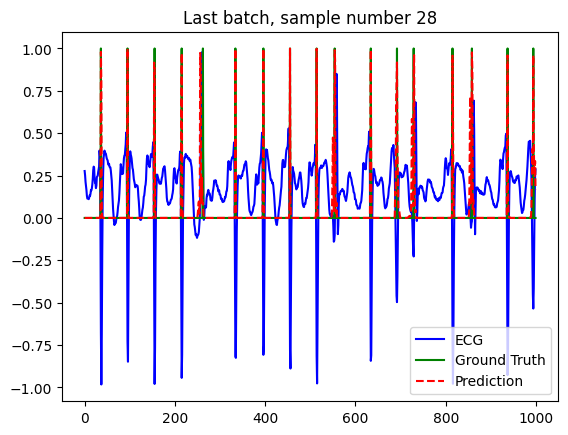

100%|██████████| 119/119 [00:06<00:00, 17.96it/s]


Learning rate:  [0.0001]

Train Loss: 0.0394
Train Weighted Accuracy: 0.99755
Train F1 Score: 0.97266
Train TPR: 0.99577
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00423



100%|██████████| 20/20 [00:00<00:00, 25.77it/s]



Validation Loss: 0.0441
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97233
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [70/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.90it/s]

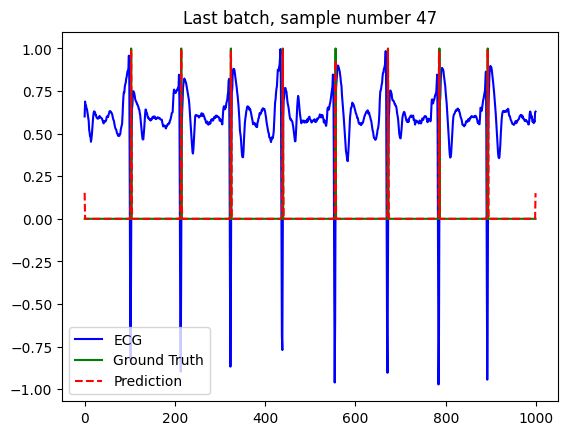

100%|██████████| 119/119 [00:06<00:00, 17.75it/s]


Learning rate:  [0.0001]

Train Loss: 0.0394
Train Weighted Accuracy: 0.99756
Train F1 Score: 0.97269
Train TPR: 0.99578
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00422



100%|██████████| 20/20 [00:00<00:00, 30.08it/s]



Validation Loss: 0.0441
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97227
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [71/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.87it/s]

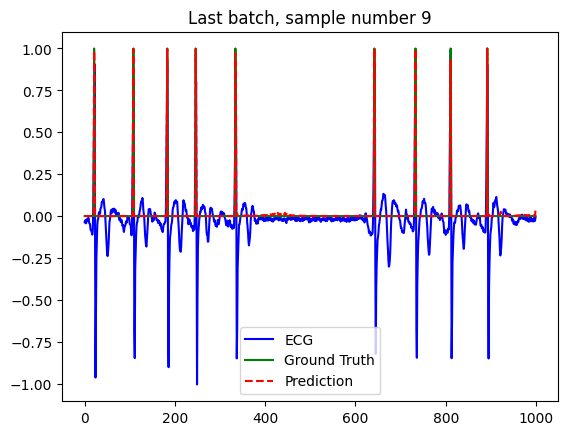

100%|██████████| 119/119 [00:06<00:00, 17.82it/s]


Learning rate:  [0.0001]

Train Loss: 0.0394
Train Weighted Accuracy: 0.99755
Train F1 Score: 0.97269
Train TPR: 0.99577
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00423



100%|██████████| 20/20 [00:00<00:00, 27.02it/s]



Validation Loss: 0.0441
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97227
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [72/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.91it/s]

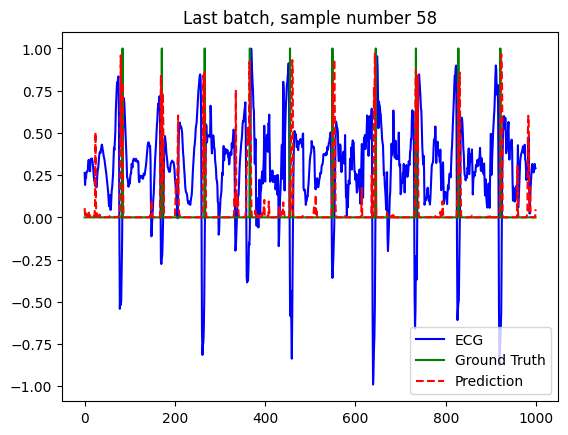

100%|██████████| 119/119 [00:06<00:00, 18.26it/s]


Learning rate:  [0.0001]

Train Loss: 0.0394
Train Weighted Accuracy: 0.99755
Train F1 Score: 0.97271
Train TPR: 0.99576
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00424



100%|██████████| 20/20 [00:00<00:00, 30.82it/s]



Validation Loss: 0.0441
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97225
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [73/100]====


 98%|█████████▊| 117/119 [00:06<00:00, 19.63it/s]

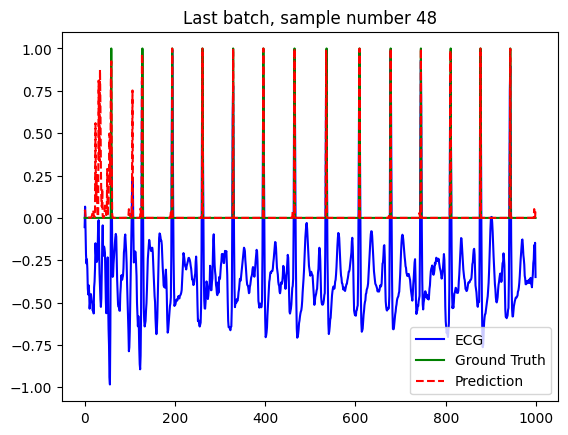

100%|██████████| 119/119 [00:06<00:00, 17.42it/s]


Learning rate:  [0.0001]

Train Loss: 0.0394
Train Weighted Accuracy: 0.99755
Train F1 Score: 0.97269
Train TPR: 0.99577
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00423



100%|██████████| 20/20 [00:00<00:00, 31.65it/s]



Validation Loss: 0.0440
Validation Weighted Accuracy: 0.99722
Validation F1 Score: 0.97231
Validation TPR: 0.99511
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00489

====Epoch [74/100]====


 97%|█████████▋| 116/119 [00:06<00:00, 19.72it/s]

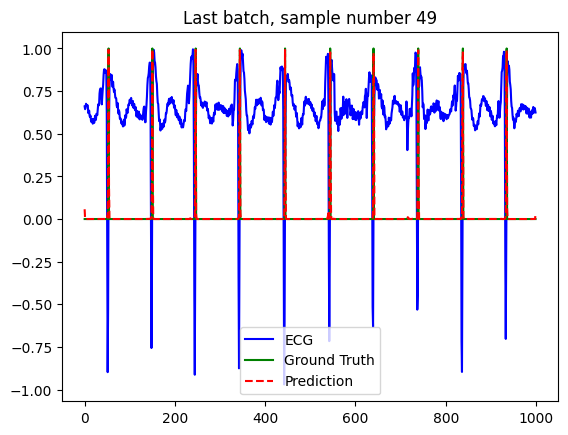

100%|██████████| 119/119 [00:06<00:00, 17.93it/s]


Learning rate:  [0.0001]

Train Loss: 0.0393
Train Weighted Accuracy: 0.99755
Train F1 Score: 0.97266
Train TPR: 0.99577
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00423



100%|██████████| 20/20 [00:00<00:00, 28.79it/s]



Validation Loss: 0.0440
Validation Weighted Accuracy: 0.99724
Validation F1 Score: 0.97239
Validation TPR: 0.99515
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00485

====Epoch [75/100]====


 98%|█████████▊| 117/119 [00:06<00:00, 19.66it/s]

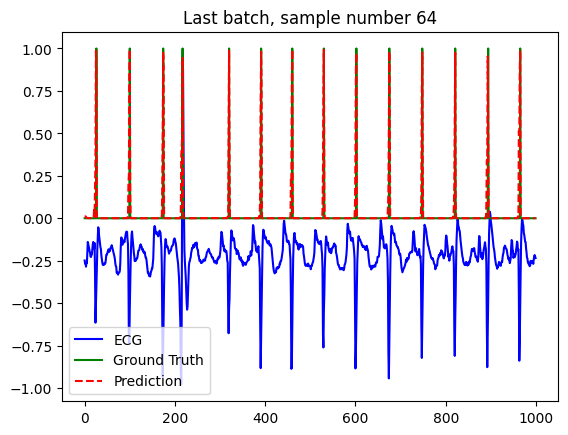

100%|██████████| 119/119 [00:06<00:00, 17.40it/s]


Learning rate:  [0.0001]

Train Loss: 0.0393
Train Weighted Accuracy: 0.99755
Train F1 Score: 0.97269
Train TPR: 0.99577
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00423



100%|██████████| 20/20 [00:00<00:00, 32.10it/s]



Validation Loss: 0.0440
Validation Weighted Accuracy: 0.99724
Validation F1 Score: 0.97237
Validation TPR: 0.99515
Validation FPR: 0.00067
Validation TNR: 0.99933
Validation FNR: 0.00485

====Epoch [76/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.92it/s]

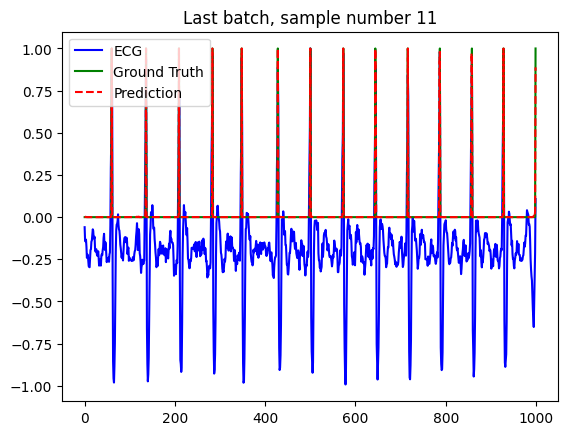

100%|██████████| 119/119 [00:06<00:00, 17.54it/s]


Learning rate:  [0.0001]

Train Loss: 0.0393
Train Weighted Accuracy: 0.99756
Train F1 Score: 0.97270
Train TPR: 0.99578
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00422



100%|██████████| 20/20 [00:00<00:00, 27.75it/s]



Validation Loss: 0.0440
Validation Weighted Accuracy: 0.99724
Validation F1 Score: 0.97239
Validation TPR: 0.99515
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00485

====Epoch [77/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.95it/s]

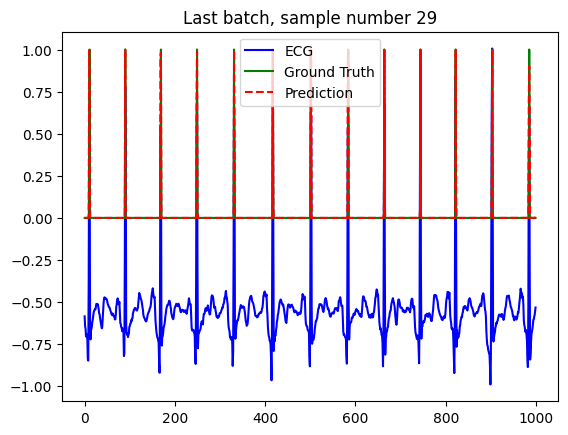

100%|██████████| 119/119 [00:06<00:00, 17.76it/s]


Learning rate:  [0.0001]

Train Loss: 0.0393
Train Weighted Accuracy: 0.99756
Train F1 Score: 0.97271
Train TPR: 0.99578
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00422



100%|██████████| 20/20 [00:00<00:00, 27.56it/s]



Validation Loss: 0.0440
Validation Weighted Accuracy: 0.99724
Validation F1 Score: 0.97240
Validation TPR: 0.99515
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00485

====Epoch [78/100]====


 98%|█████████▊| 117/119 [00:06<00:00, 19.88it/s]

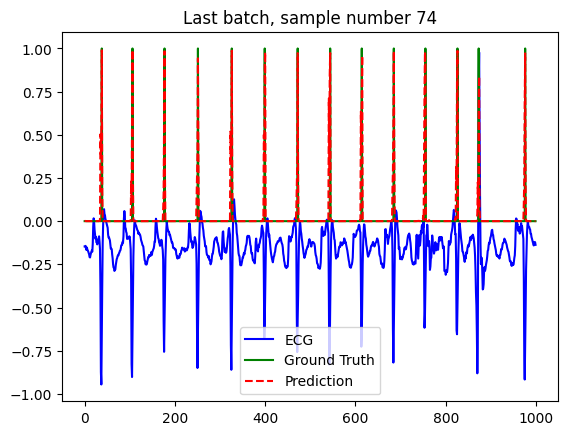

100%|██████████| 119/119 [00:06<00:00, 17.47it/s]


Learning rate:  [0.0001]

Train Loss: 0.0393
Train Weighted Accuracy: 0.99756
Train F1 Score: 0.97280
Train TPR: 0.99579
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00421



100%|██████████| 20/20 [00:00<00:00, 27.25it/s]



Validation Loss: 0.0440
Validation Weighted Accuracy: 0.99724
Validation F1 Score: 0.97246
Validation TPR: 0.99515
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00485

====Epoch [79/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.87it/s]

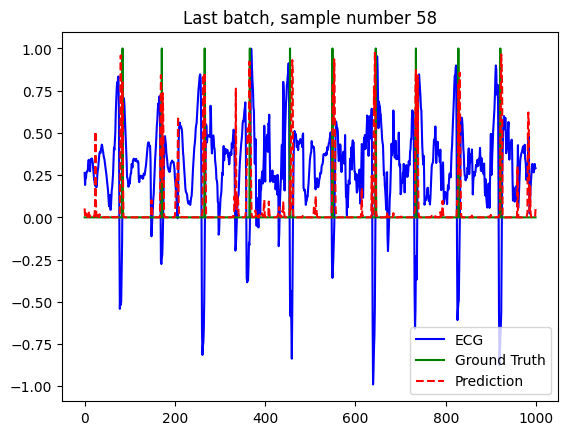

100%|██████████| 119/119 [00:06<00:00, 18.02it/s]


Learning rate:  [0.0001]

Train Loss: 0.0393
Train Weighted Accuracy: 0.99756
Train F1 Score: 0.97275
Train TPR: 0.99578
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00422



100%|██████████| 20/20 [00:00<00:00, 26.78it/s]



Validation Loss: 0.0440
Validation Weighted Accuracy: 0.99724
Validation F1 Score: 0.97246
Validation TPR: 0.99515
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00485

====Epoch [80/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.82it/s]

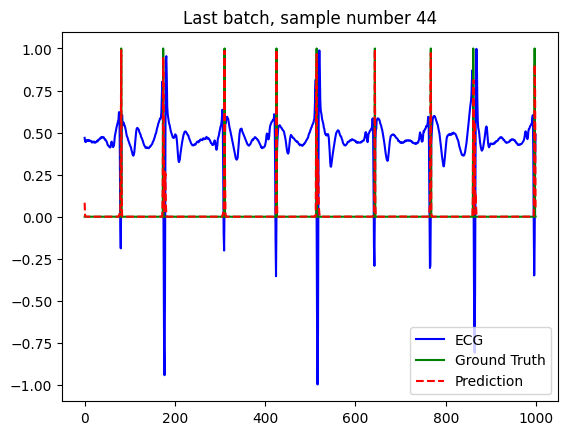

100%|██████████| 119/119 [00:06<00:00, 17.56it/s]


Learning rate:  [0.0001]

Train Loss: 0.0392
Train Weighted Accuracy: 0.99756
Train F1 Score: 0.97277
Train TPR: 0.99578
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00422



100%|██████████| 20/20 [00:00<00:00, 31.69it/s]



Validation Loss: 0.0440
Validation Weighted Accuracy: 0.99724
Validation F1 Score: 0.97252
Validation TPR: 0.99515
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00485

====Epoch [81/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.87it/s]

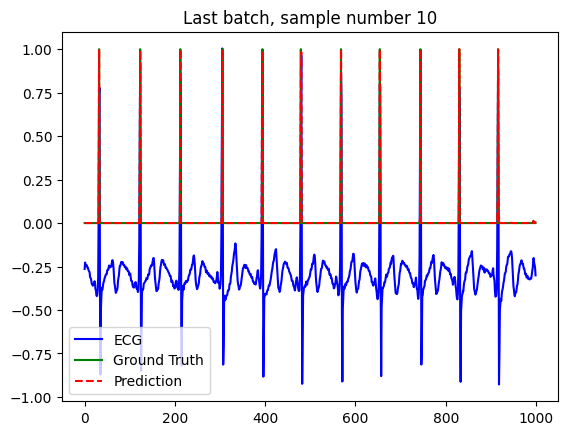

100%|██████████| 119/119 [00:06<00:00, 18.02it/s]


Learning rate:  [0.0001]

Train Loss: 0.0392
Train Weighted Accuracy: 0.99756
Train F1 Score: 0.97279
Train TPR: 0.99578
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00422



100%|██████████| 20/20 [00:00<00:00, 28.83it/s]



Validation Loss: 0.0440
Validation Weighted Accuracy: 0.99724
Validation F1 Score: 0.97254
Validation TPR: 0.99515
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00485

====Epoch [82/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.91it/s]

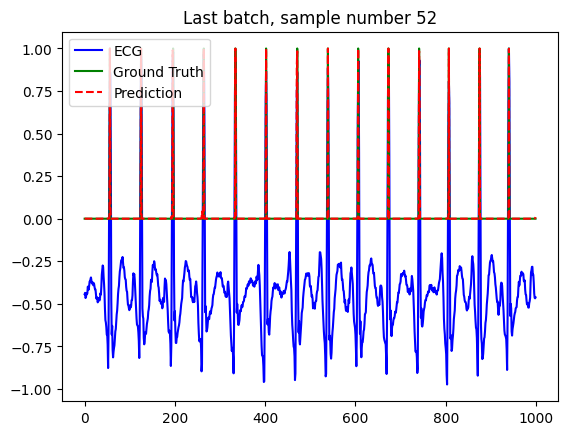

100%|██████████| 119/119 [00:06<00:00, 17.54it/s]


Learning rate:  [0.0001]

Train Loss: 0.0392
Train Weighted Accuracy: 0.99756
Train F1 Score: 0.97278
Train TPR: 0.99578
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00422



100%|██████████| 20/20 [00:00<00:00, 29.15it/s]



Validation Loss: 0.0440
Validation Weighted Accuracy: 0.99724
Validation F1 Score: 0.97252
Validation TPR: 0.99515
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00485

====Epoch [83/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.92it/s]

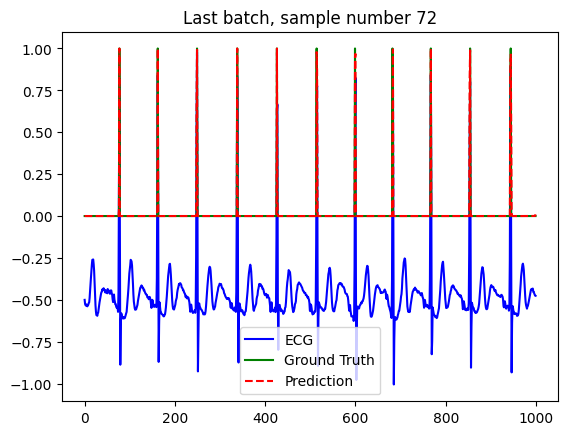

100%|██████████| 119/119 [00:06<00:00, 17.83it/s]


Learning rate:  [0.0001]

Train Loss: 0.0392
Train Weighted Accuracy: 0.99756
Train F1 Score: 0.97278
Train TPR: 0.99579
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00421



100%|██████████| 20/20 [00:00<00:00, 27.68it/s]



Validation Loss: 0.0440
Validation Weighted Accuracy: 0.99724
Validation F1 Score: 0.97256
Validation TPR: 0.99515
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00485

====Epoch [84/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.93it/s]

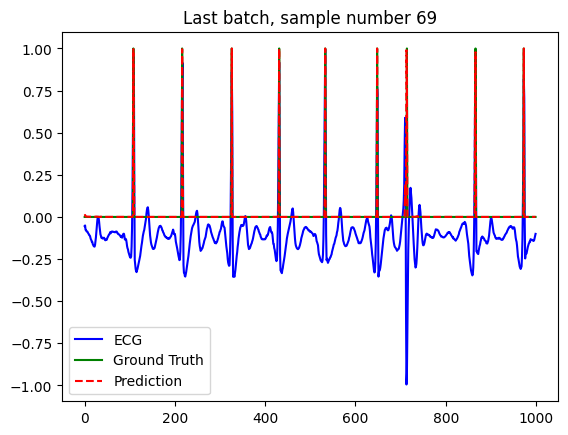

100%|██████████| 119/119 [00:06<00:00, 17.91it/s]


Learning rate:  [0.0001]

Train Loss: 0.0392
Train Weighted Accuracy: 0.99756
Train F1 Score: 0.97277
Train TPR: 0.99578
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00422



100%|██████████| 20/20 [00:00<00:00, 30.47it/s]



Validation Loss: 0.0440
Validation Weighted Accuracy: 0.99724
Validation F1 Score: 0.97259
Validation TPR: 0.99515
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00485

====Epoch [85/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.95it/s]

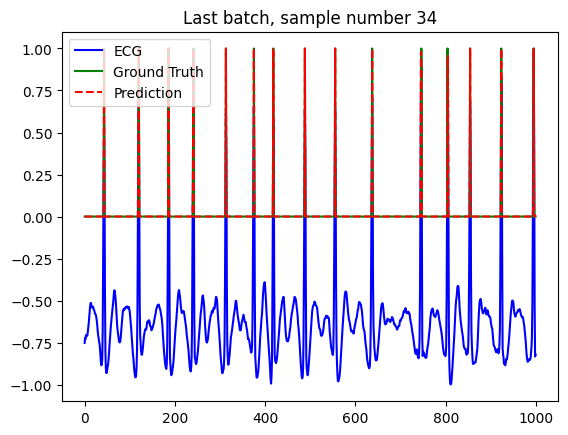

100%|██████████| 119/119 [00:06<00:00, 17.73it/s]


Learning rate:  [0.0001]

Train Loss: 0.0392
Train Weighted Accuracy: 0.99757
Train F1 Score: 0.97281
Train TPR: 0.99580
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00420



100%|██████████| 20/20 [00:00<00:00, 28.78it/s]



Validation Loss: 0.0440
Validation Weighted Accuracy: 0.99725
Validation F1 Score: 0.97265
Validation TPR: 0.99515
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00485

====Epoch [86/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.90it/s]

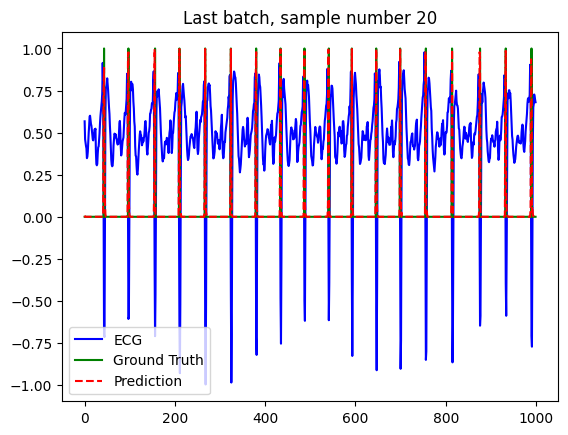

100%|██████████| 119/119 [00:06<00:00, 17.99it/s]


Learning rate:  [0.0001]

Train Loss: 0.0391
Train Weighted Accuracy: 0.99757
Train F1 Score: 0.97280
Train TPR: 0.99580
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00420



100%|██████████| 20/20 [00:00<00:00, 29.53it/s]



Validation Loss: 0.0440
Validation Weighted Accuracy: 0.99725
Validation F1 Score: 0.97265
Validation TPR: 0.99515
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00485

====Epoch [87/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.91it/s]

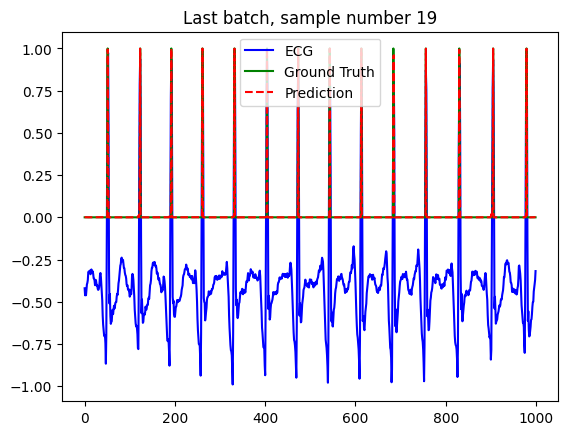

100%|██████████| 119/119 [00:06<00:00, 17.67it/s]


Learning rate:  [0.0001]

Train Loss: 0.0391
Train Weighted Accuracy: 0.99757
Train F1 Score: 0.97278
Train TPR: 0.99581
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00419



100%|██████████| 20/20 [00:00<00:00, 30.45it/s]



Validation Loss: 0.0439
Validation Weighted Accuracy: 0.99723
Validation F1 Score: 0.97265
Validation TPR: 0.99511
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00489

====Epoch [88/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.96it/s]

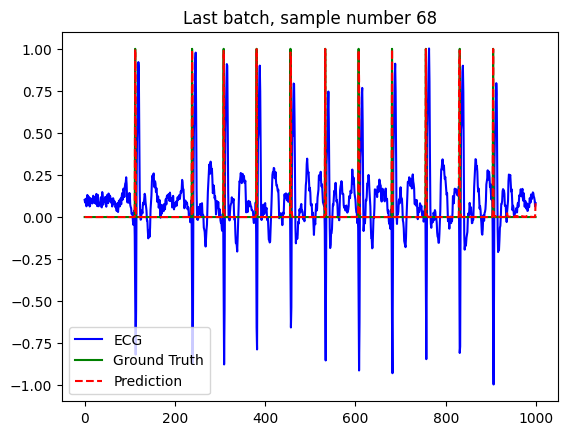

100%|██████████| 119/119 [00:06<00:00, 17.91it/s]


Learning rate:  [0.0001]

Train Loss: 0.0391
Train Weighted Accuracy: 0.99757
Train F1 Score: 0.97277
Train TPR: 0.99581
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00419



100%|██████████| 20/20 [00:00<00:00, 25.87it/s]



Validation Loss: 0.0439
Validation Weighted Accuracy: 0.99723
Validation F1 Score: 0.97265
Validation TPR: 0.99511
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00489

====Epoch [89/100]====


 98%|█████████▊| 117/119 [00:06<00:00, 19.83it/s]

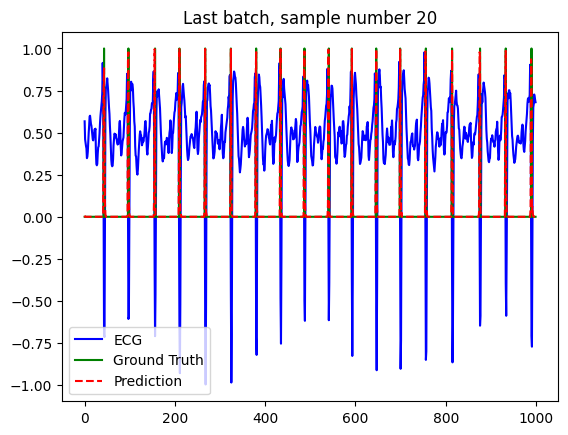

100%|██████████| 119/119 [00:06<00:00, 17.87it/s]


Learning rate:  [0.0001]

Train Loss: 0.0391
Train Weighted Accuracy: 0.99758
Train F1 Score: 0.97279
Train TPR: 0.99582
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00418



100%|██████████| 20/20 [00:00<00:00, 30.52it/s]



Validation Loss: 0.0439
Validation Weighted Accuracy: 0.99723
Validation F1 Score: 0.97269
Validation TPR: 0.99511
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00489

====Epoch [90/100]====


 97%|█████████▋| 116/119 [00:06<00:00, 18.87it/s]

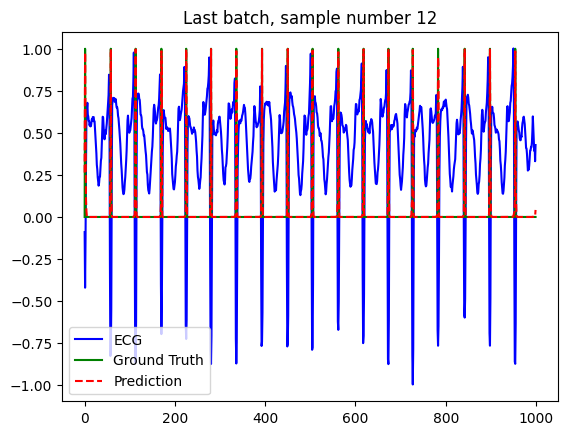

100%|██████████| 119/119 [00:06<00:00, 17.75it/s]


Learning rate:  [0.0001]

Train Loss: 0.0391
Train Weighted Accuracy: 0.99758
Train F1 Score: 0.97278
Train TPR: 0.99582
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00418



100%|██████████| 20/20 [00:00<00:00, 28.08it/s]



Validation Loss: 0.0439
Validation Weighted Accuracy: 0.99723
Validation F1 Score: 0.97269
Validation TPR: 0.99511
Validation FPR: 0.00066
Validation TNR: 0.99934
Validation FNR: 0.00489

====Epoch [91/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.96it/s]

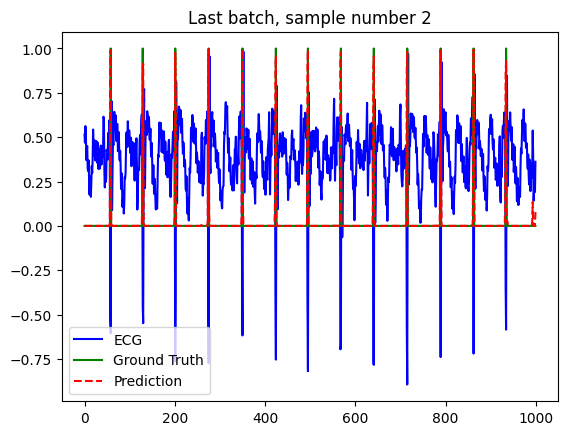

100%|██████████| 119/119 [00:07<00:00, 16.98it/s]


Learning rate:  [0.0001]

Train Loss: 0.0391
Train Weighted Accuracy: 0.99758
Train F1 Score: 0.97277
Train TPR: 0.99582
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00418



100%|██████████| 20/20 [00:00<00:00, 30.55it/s]



Validation Loss: 0.0439
Validation Weighted Accuracy: 0.99723
Validation F1 Score: 0.97272
Validation TPR: 0.99511
Validation FPR: 0.00065
Validation TNR: 0.99935
Validation FNR: 0.00489

====Epoch [92/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.91it/s]

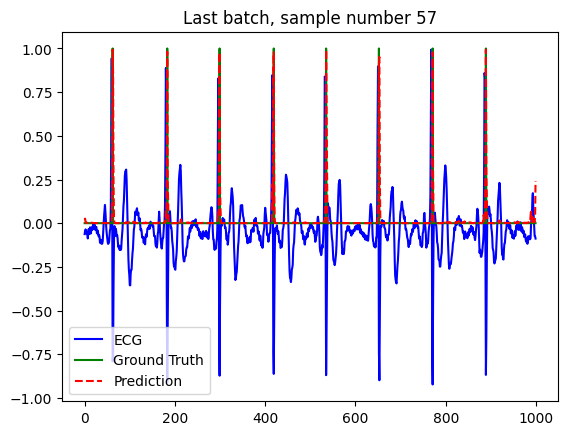

100%|██████████| 119/119 [00:06<00:00, 17.65it/s]


Learning rate:  [0.0001]

Train Loss: 0.0390
Train Weighted Accuracy: 0.99757
Train F1 Score: 0.97282
Train TPR: 0.99581
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00419



100%|██████████| 20/20 [00:00<00:00, 26.54it/s]



Validation Loss: 0.0439
Validation Weighted Accuracy: 0.99723
Validation F1 Score: 0.97272
Validation TPR: 0.99511
Validation FPR: 0.00065
Validation TNR: 0.99935
Validation FNR: 0.00489

====Epoch [93/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.92it/s]

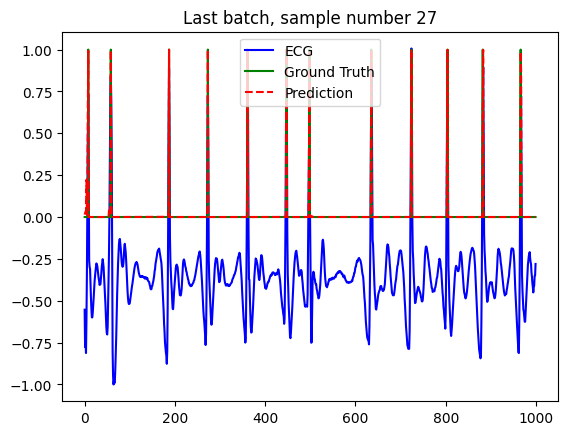

100%|██████████| 119/119 [00:06<00:00, 17.79it/s]


Learning rate:  [0.0001]

Train Loss: 0.0390
Train Weighted Accuracy: 0.99758
Train F1 Score: 0.97280
Train TPR: 0.99582
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00418



100%|██████████| 20/20 [00:00<00:00, 30.84it/s]



Validation Loss: 0.0439
Validation Weighted Accuracy: 0.99723
Validation F1 Score: 0.97276
Validation TPR: 0.99511
Validation FPR: 0.00065
Validation TNR: 0.99935
Validation FNR: 0.00489

====Epoch [94/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.90it/s]

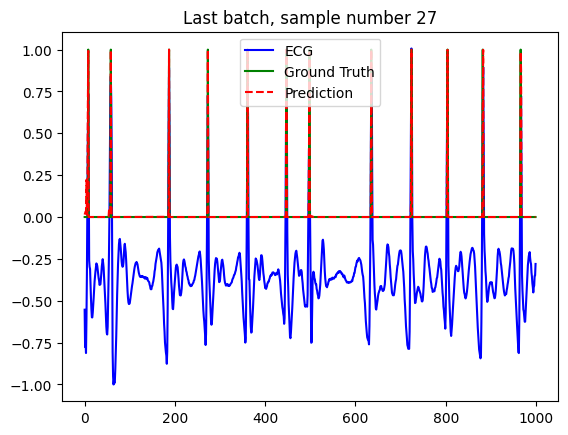

100%|██████████| 119/119 [00:06<00:00, 17.68it/s]


Learning rate:  [0.0001]

Train Loss: 0.0390
Train Weighted Accuracy: 0.99758
Train F1 Score: 0.97280
Train TPR: 0.99582
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00418



100%|██████████| 20/20 [00:00<00:00, 30.00it/s]



Validation Loss: 0.0439
Validation Weighted Accuracy: 0.99723
Validation F1 Score: 0.97278
Validation TPR: 0.99511
Validation FPR: 0.00065
Validation TNR: 0.99935
Validation FNR: 0.00489

====Epoch [95/100]====


 98%|█████████▊| 117/119 [00:06<00:00, 19.88it/s]

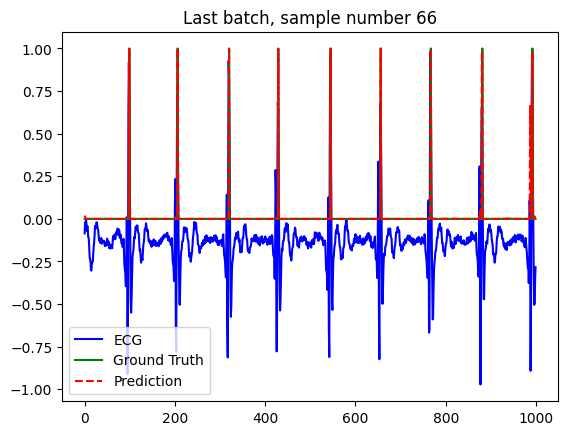

100%|██████████| 119/119 [00:06<00:00, 18.21it/s]


Learning rate:  [0.0001]

Train Loss: 0.0390
Train Weighted Accuracy: 0.99758
Train F1 Score: 0.97277
Train TPR: 0.99582
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00418



100%|██████████| 20/20 [00:00<00:00, 25.84it/s]



Validation Loss: 0.0439
Validation Weighted Accuracy: 0.99723
Validation F1 Score: 0.97280
Validation TPR: 0.99511
Validation FPR: 0.00065
Validation TNR: 0.99935
Validation FNR: 0.00489

====Epoch [96/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.93it/s]

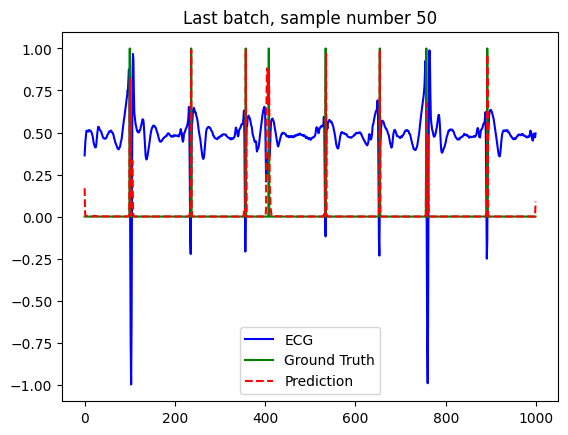

100%|██████████| 119/119 [00:06<00:00, 17.85it/s]


Learning rate:  [0.0001]

Train Loss: 0.0390
Train Weighted Accuracy: 0.99758
Train F1 Score: 0.97276
Train TPR: 0.99582
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00418



100%|██████████| 20/20 [00:00<00:00, 30.67it/s]



Validation Loss: 0.0439
Validation Weighted Accuracy: 0.99723
Validation F1 Score: 0.97288
Validation TPR: 0.99511
Validation FPR: 0.00065
Validation TNR: 0.99935
Validation FNR: 0.00489

====Epoch [97/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.88it/s]

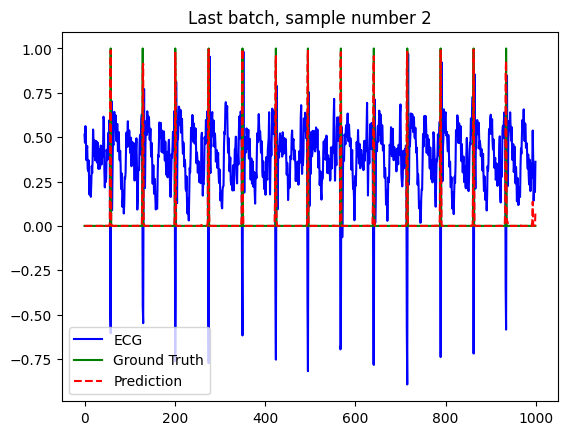

100%|██████████| 119/119 [00:06<00:00, 18.08it/s]


Learning rate:  [0.0001]

Train Loss: 0.0390
Train Weighted Accuracy: 0.99758
Train F1 Score: 0.97275
Train TPR: 0.99582
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00418



100%|██████████| 20/20 [00:00<00:00, 27.93it/s]



Validation Loss: 0.0439
Validation Weighted Accuracy: 0.99723
Validation F1 Score: 0.97286
Validation TPR: 0.99511
Validation FPR: 0.00065
Validation TNR: 0.99935
Validation FNR: 0.00489

====Epoch [98/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.95it/s]

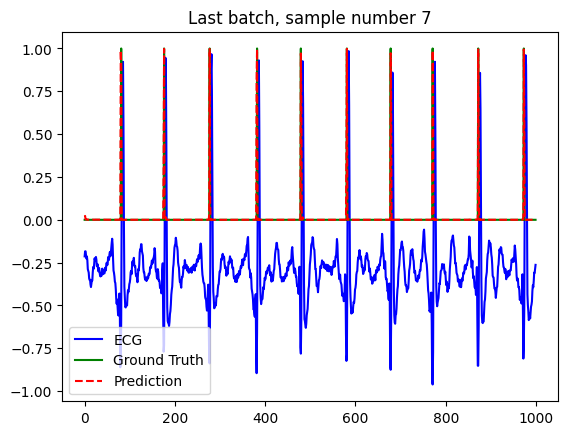

100%|██████████| 119/119 [00:06<00:00, 18.24it/s]


Learning rate:  [0.0001]

Train Loss: 0.0389
Train Weighted Accuracy: 0.99758
Train F1 Score: 0.97275
Train TPR: 0.99583
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00417



100%|██████████| 20/20 [00:00<00:00, 26.99it/s]



Validation Loss: 0.0439
Validation Weighted Accuracy: 0.99723
Validation F1 Score: 0.97286
Validation TPR: 0.99511
Validation FPR: 0.00065
Validation TNR: 0.99935
Validation FNR: 0.00489

====Epoch [99/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.95it/s]

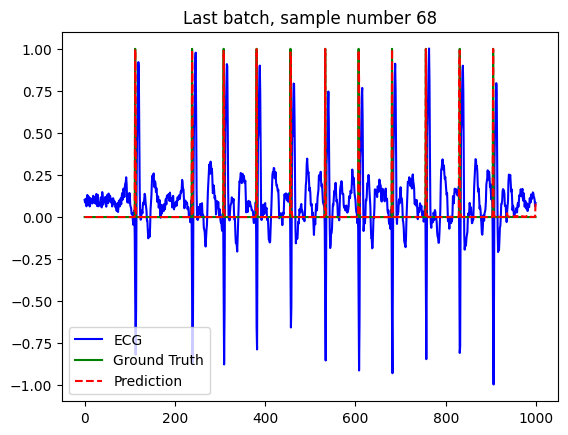

100%|██████████| 119/119 [00:06<00:00, 17.56it/s]


Learning rate:  [0.0001]

Train Loss: 0.0389
Train Weighted Accuracy: 0.99758
Train F1 Score: 0.97279
Train TPR: 0.99582
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00418



100%|██████████| 20/20 [00:00<00:00, 28.78it/s]



Validation Loss: 0.0439
Validation Weighted Accuracy: 0.99723
Validation F1 Score: 0.97293
Validation TPR: 0.99511
Validation FPR: 0.00065
Validation TNR: 0.99935
Validation FNR: 0.00489

====Epoch [100/100]====


 99%|█████████▉| 118/119 [00:06<00:00, 19.82it/s]

100%|██████████| 119/119 [00:06<00:00, 17.84it/s]


Learning rate:  [0.0001]

Train Loss: 0.0389
Train Weighted Accuracy: 0.99759
Train F1 Score: 0.97277
Train TPR: 0.99584
Train FPR: 0.00066
Train TNR: 0.99934
Train FNR: 0.00416



100%|██████████| 20/20 [00:00<00:00, 27.10it/s]



Validation Loss: 0.0439
Validation Weighted Accuracy: 0.99723
Validation F1 Score: 0.97293
Validation TPR: 0.99511
Validation FPR: 0.00065
Validation TNR: 0.99935
Validation FNR: 0.00489



In [10]:
model.train_model(x_train=x_train, y_train=y_train, epochs=2, x_val=x_val, y_val=y_val, batch_size=BATCH_SIZE)

  0%|          | 0/396 [00:00<?, ?it/s]

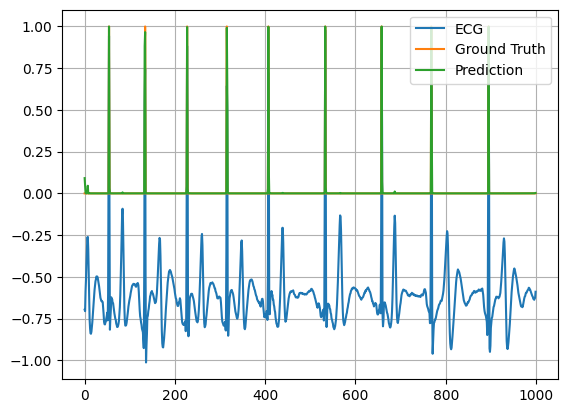

 10%|▉         | 39/396 [00:00<00:04, 76.49it/s]

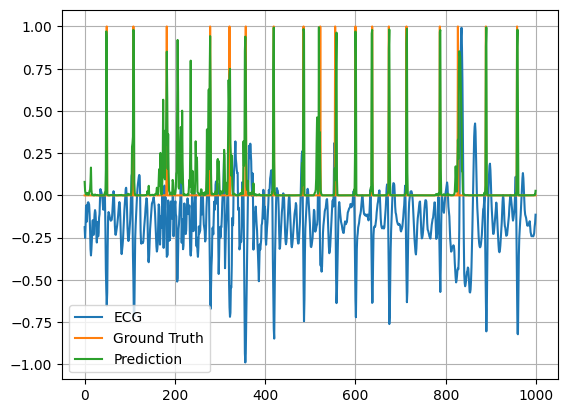

 18%|█▊        | 70/396 [00:01<00:04, 69.74it/s]

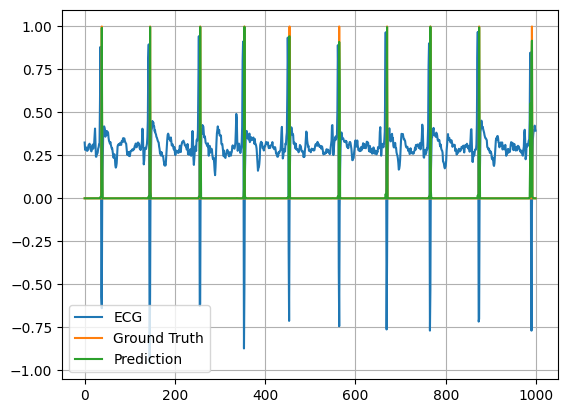

 30%|██▉       | 117/396 [00:01<00:03, 92.36it/s]

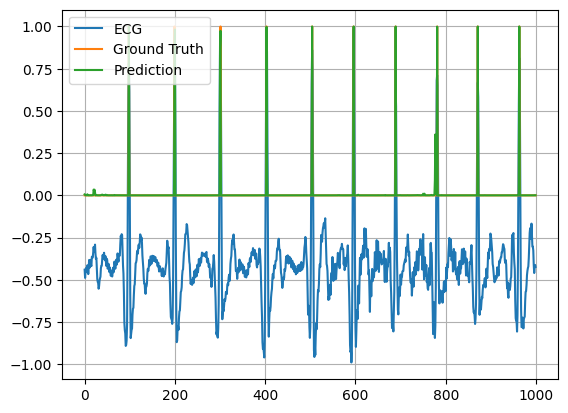

 39%|███▊      | 153/396 [00:02<00:02, 93.56it/s]

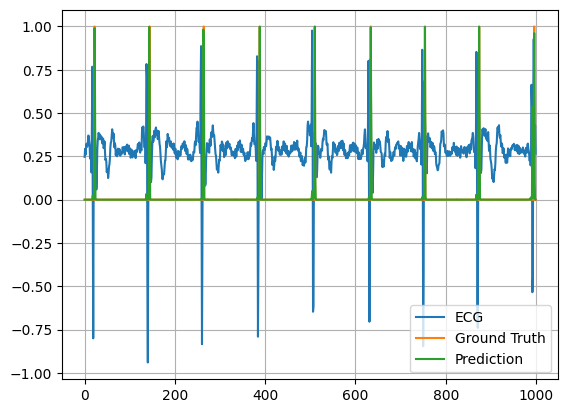

 48%|████▊     | 191/396 [00:02<00:02, 94.05it/s]

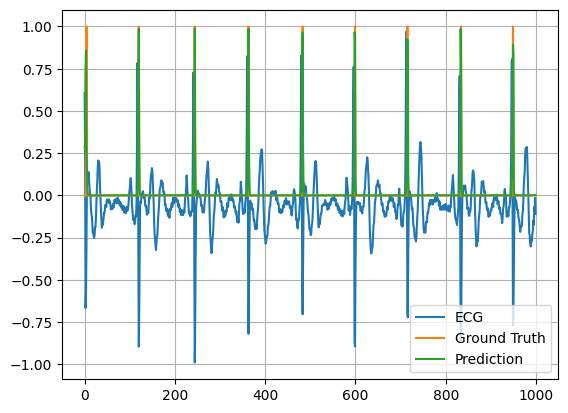

 58%|█████▊    | 229/396 [00:03<00:01, 97.80it/s]

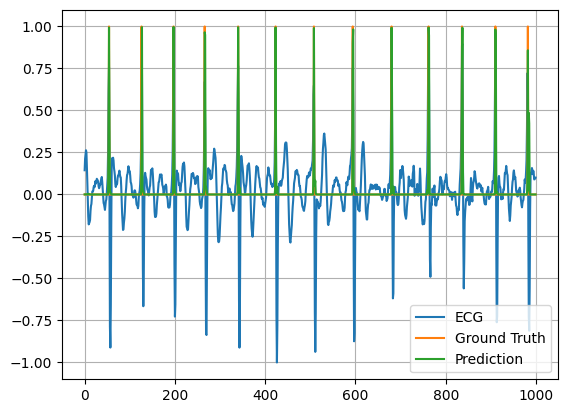

 67%|██████▋   | 265/396 [00:03<00:01, 94.93it/s]

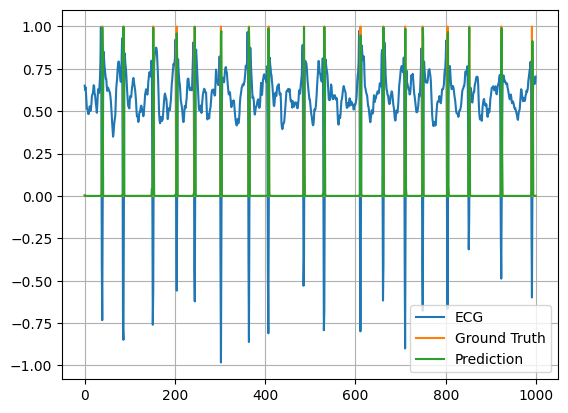

 76%|███████▋  | 302/396 [00:04<00:00, 97.09it/s]

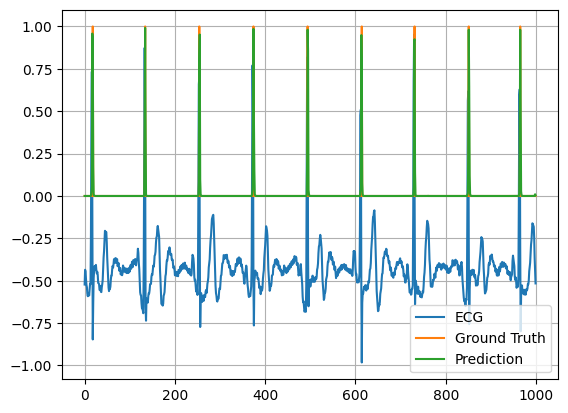

 86%|████████▌ | 339/396 [00:04<00:00, 98.29it/s]

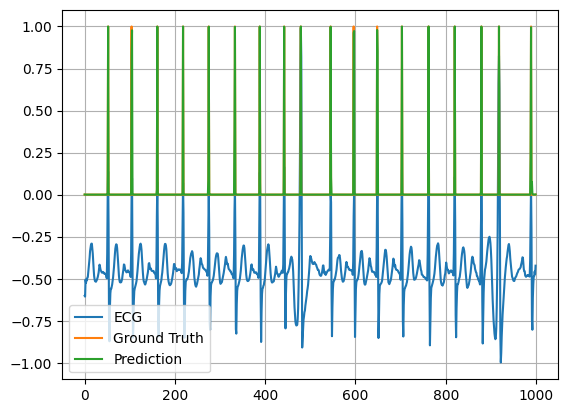

 95%|█████████▌| 377/396 [00:04<00:00, 97.90it/s]

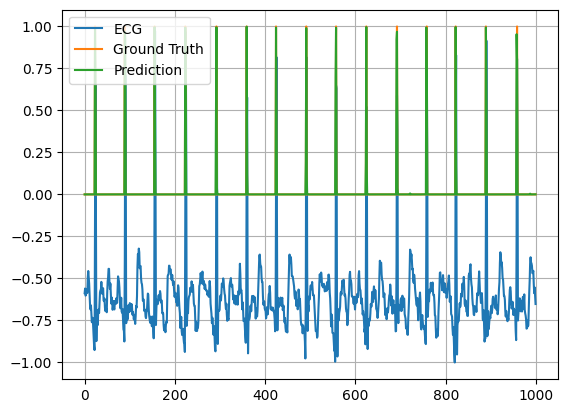

100%|██████████| 396/396 [00:05<00:00, 75.85it/s]



Test Loss: 0.0396
test Weighted Accuracy: 0.99777
test F1 Score: 0.97517
test TPR: 0.99613
test FPR: 0.00060
test TNR: 0.99940
test FNR: 0.00387



In [10]:
model.test_model(x_test=x_test, y_test=y_test, plot=True)

### Testing with Apnea-ecg dataset

In [5]:
model = LSTM(input_dim=1, hidden_size=LSTM_HIDDEN_SIZE, lr=LR, loss_pos_weight=torch.Tensor([17])) #input_size == hidden features size (1-lead ECG)
model.load_state_dict(torch.load(".\\checkpoints\\lstm\\lstm_epoch_50_acc_99.80_f1_0.97.pt"))

Training will be performed with: cuda:0


e:\anaconda3\envs\torch\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


<All keys matched successfully>

In [6]:
x_train, y_train, x_test, y_test, x_val, y_val = read_dataset(path=apnea_ecg_path+"\\dataset", is_validation_set=True)

x_train = np.expand_dims(x_train, 2)
y_train = np.expand_dims(y_train, 2)

x_test = np.expand_dims(x_test, 2)
y_test = np.expand_dims(y_test, 2)

x_val = np.expand_dims(x_val, 2)
y_val = np.expand_dims(y_val, 2)

In [22]:
x , y = load_physionet_ecgs(path=apnea_ecg_path, annotation_file_extension="qrs", window_in_seconds=10, force_new=False, expand=False, denoise=True)

In [23]:
x_test = np.expand_dims(x, 2)
y_test = np.expand_dims(y, 2)

  0%|          | 0/20330 [00:00<?, ?it/s]

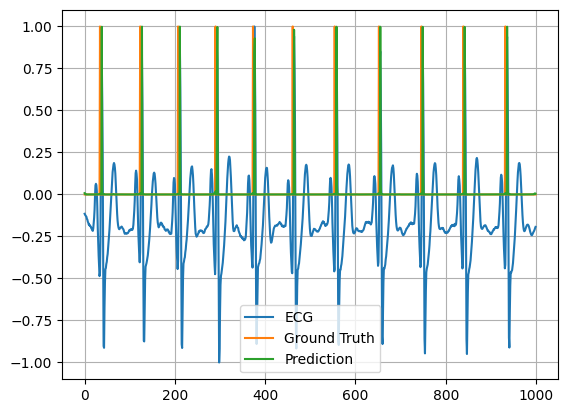

 10%|▉         | 2026/20330 [00:16<02:20, 130.70it/s]

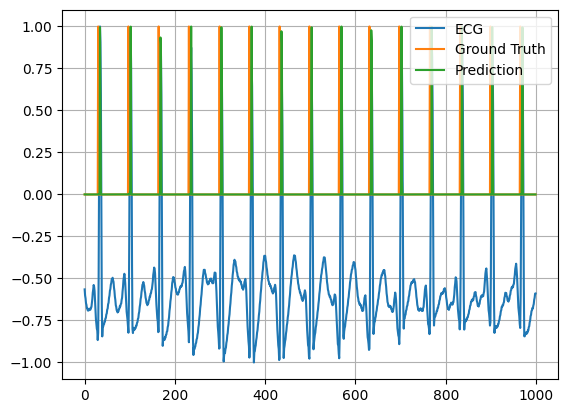

 20%|██        | 4066/20330 [00:33<02:03, 131.73it/s]

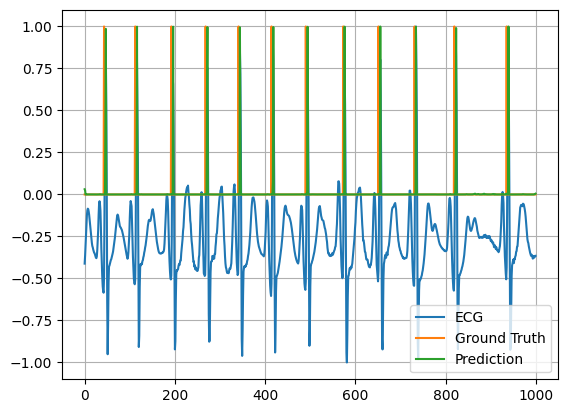

 30%|██▉       | 6090/20330 [00:50<03:00, 78.97it/s] 

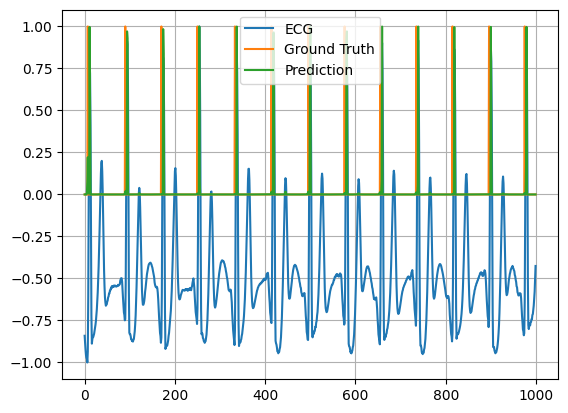

 40%|███▉      | 8121/20330 [01:06<01:33, 130.76it/s]

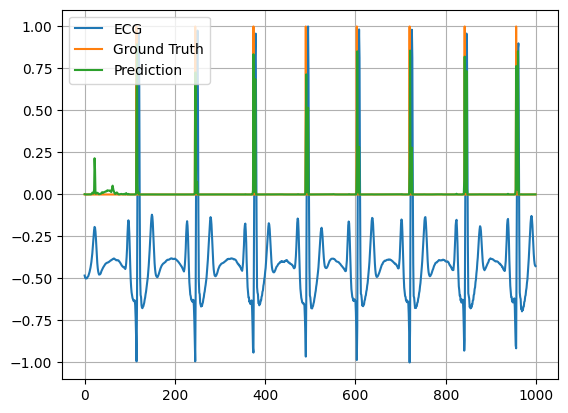

 50%|████▉     | 10160/20330 [01:22<01:22, 123.30it/s]

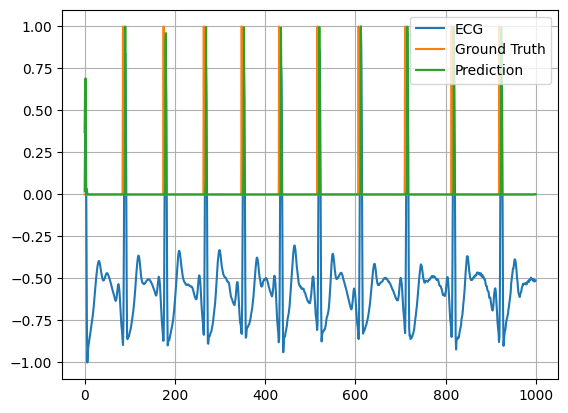

 60%|█████▉    | 12196/20330 [01:38<01:02, 130.09it/s]

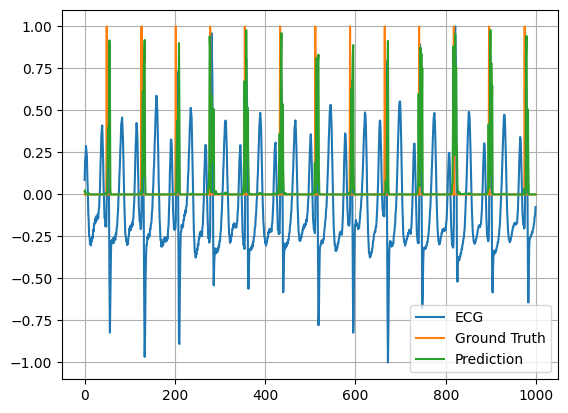

 70%|██████▉   | 14229/20330 [01:55<00:46, 130.62it/s]

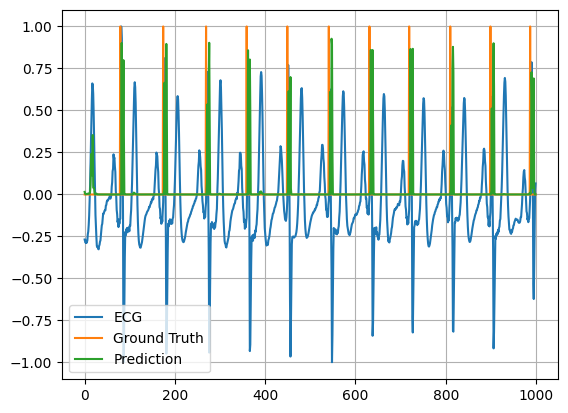

 80%|███████▉  | 16256/20330 [02:11<00:30, 133.58it/s]

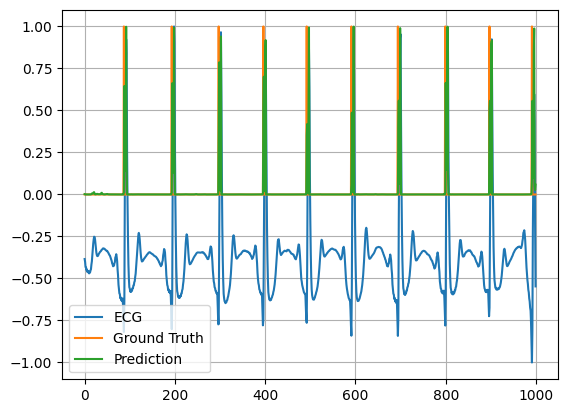

 90%|████████▉ | 18284/20330 [02:28<00:15, 133.86it/s]

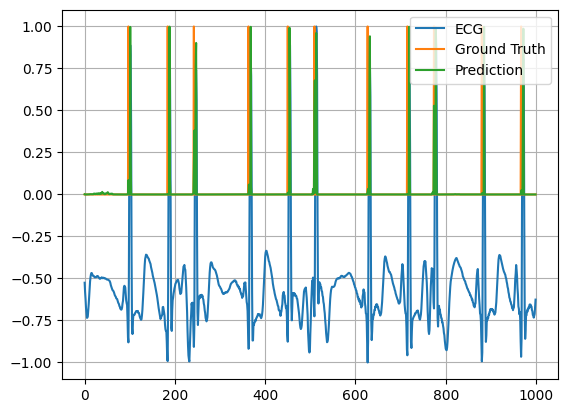

100%|██████████| 20330/20330 [02:46<00:00, 122.33it/s]



Test Loss: 1.1222
test Weighted Accuracy: 0.99441
test F1 Score: 0.89243
test TPR: 0.99139
test FPR: 0.00257
test TNR: 0.99743
test FNR: 0.00861



In [24]:
model.test_model(x_test=x_test, y_test=y_test, plot=True)

### Testing with own ECG recording

In [7]:
my_test = np.load("E:\\ml-data\\masters-thesis\\myDataset\\Patryk\\07-05-24_16_56.npy")

In [8]:
ECGs = split_signal(signal=my_test, fs=250, overlap_factor=0.25, window_in_seconds=10, normalize=True, denoise=True)

In [9]:
my_X = []
my_Y = []

for ECG in ECGs:
  my_X.append(ECG)
  
  _, r_peaks = nk.ecg_peaks(ecg_cleaned=ECG, sampling_rate=250)
  r_peaks = r_peaks["ECG_R_Peaks"]
  y = np.zeros_like(ECG)
  y[r_peaks] = 1

  my_Y.append(y)

my_Y = np.array(my_Y)
my_X = np.array(my_X)
my_X = np.expand_dims(my_X, 2)
my_Y = np.expand_dims(my_Y, 2)

In [14]:
model.test_model(x_test=my_X, y_test=my_Y, plot=True)

  0%|          | 0/8 [00:00<?, ?it/s]


ZeroDivisionError: integer modulo by zero

### Downsampling own ECG from 250 Hz to 100 Hz

In [15]:
from scipy.signal import resample

In [16]:
ecg_data = my_X[0]
downsampled_ecg_data = resample(ecg_data, 1000)

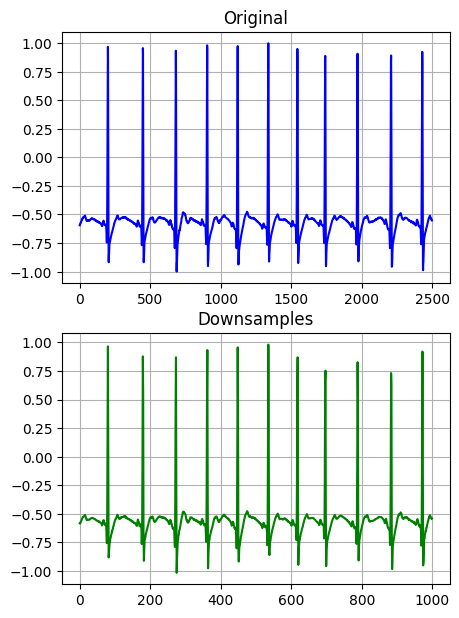

In [17]:
plt.figure(figsize=(5,15))
plt.subplot(4,1,1)
plt.plot(ecg_data, 'b-')
plt.title("Original")
plt.grid()
plt.subplot(4,1,2)
plt.plot(downsampled_ecg_data, 'g-')
plt.title("Downsamples")
plt.grid()
plt.show()

In [18]:
my_X = []
my_Y = []

for ECG in ECGs:
  ECG = norm_min_max(signal=ECG, lower=-1, upper=1)
  ECG = nk.ecg_clean(ecg_signal=ECG, sampling_rate=250)
  ECG = resample(ECG, 1000)
  my_X.append(ECG)
  
  _, r_peaks = nk.ecg_peaks(ecg_cleaned=ECG, sampling_rate=100)
  r_peaks = r_peaks["ECG_R_Peaks"]
  y = np.zeros_like(ECG)
  y[r_peaks] = 1

  my_Y.append(y)

my_Y = np.array(my_Y)
my_X = np.array(my_X)
my_X = np.expand_dims(my_X, 2)
my_Y = np.expand_dims(my_Y, 2)

In [19]:
model.test_model(x_test=my_X, y_test=my_Y)

100%|██████████| 8/8 [00:00<00:00, 39.02it/s]



Test Loss: 0.0157
Test Weighted Accuracy: 0.99816
Test F1 Score: 0.98164
Test TPR: 0.99671
Test FPR: 0.00040
Test TNR: 0.99960
Test FNR: 0.00329



### Result of downsampling from 250 Hz to 100 Hz
As the result of downsampling from 250 Hz to 100 Hz, the test loss function of the model is lower than the test loss function before the downsampling.

### Load additional dataset - PTB-XL

In [21]:
data = load_ptbxl(path="E:\\ml-data\\masters-thesis\\ptb-xl-v2\\WFDB", sampling_rate=100, files_num="all")
data = np.array(data)
data = np.expand_dims(data, 2)
data = torch.Tensor(data)
data = data.to(device)

100%|██████████| 9514/9514 [00:31<00:00, 297.59it/s]


In [ ]:
results = model(data)
results = torch.sigmoid(results)

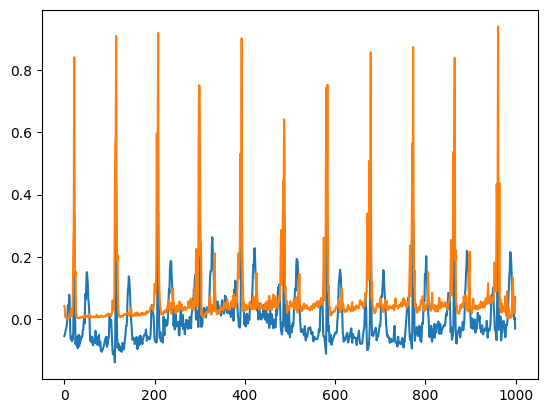

In [40]:
plt.plot(data[0].cpu())
plt.plot(results[0].cpu().detach().numpy())